### Import Statements

In [2]:
import numpy as np
import pandas as pd
import vcf
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
import pickle
import scipy.stats

%matplotlib inline

In [3]:
from Bio import SeqIO


### Set matplotlib text export settings for Adobe Illustrator

In [4]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#### Pandas Viewing Settings

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Set matplotlib text export settings for Adobe Illustrator

In [6]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Parse sample metadata & preprocessed genome info/results

## Parse sample Metadata (N = 151)

In [7]:
Repo_DataDir = "../../Data"
InputAsmPath_Dir = f"{Repo_DataDir}/231121.InputAsmTSVs.MtbSetV3.151CI"

MtbSetV3_151CI_InputAsmPATHs_TSV = f"{InputAsmPath_Dir}/231121.MtbSetV3.151CI.HybridAndSRAsm.FAPATHs.V1.tsv"

MtbSetV3_151CI_AsmSumm_TSV = f"{InputAsmPath_Dir}/231121.MtbSetV3.151CI.HybridAsm.AsmSummary.V2.tsv"

WGA151CI_AsmSummary_DF = pd.read_csv(MtbSetV3_151CI_AsmSumm_TSV, sep = "\t")

SampleIDs_151CI_SOI = list( WGA151CI_AsmSummary_DF["SampleID"].values )
WGA151CI_SampleIDs = SampleIDs_151CI_SOI

ID_To_PrimLineage_Dict = dict(WGA151CI_AsmSummary_DF[['SampleID', 'PrimaryLineage']].values)
ID_To_SubLineage_Dict = dict( WGA151CI_AsmSummary_DF[["SampleID", "Lineage"]].values)
ID_To_Dataset_Dict = dict(WGA151CI_AsmSummary_DF[['SampleID', 'Dataset_Tag']].values)
WGA151CI_AsmSummary_DF.shape

(151, 7)

In [8]:
High_SRBusco_SampleIDs_143CI = ['N0072', 'N0153', 'DNA028', 'N0155', 'N0145', 'DNA075',
       'M0003941_3', 'DNA019_Vash', 'DNA091', 'DNA096', 'AZE_02_067',
       'AZE_02_041', 'ZRB10578980', 'DNA089', 'N0004', 'N1274', 'N0054',
       'DNA124', 'DNA044', 'DNA020', 'AZE_02_042', 'DNA182', 'DNA120',
       'DNA188', 'DNA086', 'M0011368_9', 'MT_0080', 'M0016737_0',
       'DNA054', 'M0014888_3', '02_R1179', '01_R1134', 'M0017522_5',
       'M0016395_7', '02_R1708', '02_R0894', '01_R1430', 'M0010874_7',
       'N1272', 'N0091', 'N1202', '9050-05', '4549-04', '696-05',
       '702-06', '706-05', '8129-04', '3003-06', '8651-04', 'QC-3',
       'QC-9', 'QC-5', 'QC-8', 'QC-10', 'QC-4', 'QC-6', 'QC-1', '8644-04',
       'mada_1-10', 'mada_2-46', 'mada_1-1', 'mada_1-36', 'mada_1-39',
       'mada_1-40', 'mada_1-51', 'mada_1-44', 'mada_117', 'mada_118',
       'mada_122', 'R27252', 'R23887', 'R30078', 'R29816', 'R30234',
       '18_0621851', 'R36431', 'R28703', 'mada_115', 'mada_2-42',
       'R31095', 'R28012', 'R37765', 'R27657', 'R24120', 'R28581',
       'R29598', 'mada_1-11', 'R24100', 'R20574', 'R20260', 'R18043',
       'R22601', 'R23146', 'R32929', 'R21893', 'R30420', 'R26778',
       'R26791', 'R28980', 'R27725', 'R18040', 'R27937', 'mada_1-30',
       'mada_2-31', 'mada_1-41', 'R21839', 'mada_1-32', 'R30396',
       'R21363', 'mada_102', 'mada_129', 'mada_139', 'mada_151',
       'mada_105', 'R15311', 'mada_103', 'mada_2-25', 'mada_112',
       'mada_124', 'mada_126', 'mada_120', 'R23571', 'mada_128',
       'mada_1-12', 'mada_1-15', 'mada_1-2', 'mada_2-1', 'mada_1-53',
       'mada_1-50', 'mada_123', 'mada_2-53', 'MFS-3', 'MFS-59', 'MFS-173',
       'MFS-54', 'MFS-58', 'MFS-51', 'MFS-42', 'MFS-52', 'MFS-56',
       'MFS-60', 'MFS-61', 'MFS-181']

In [9]:

def read_PanarooSummaryStats(input_Panaroo_SummaryStats_TXT):
    
    i_Panaroo_Stats_DF = pd.read_csv(input_Panaroo_SummaryStats_TXT, sep = "\t", header=None)
    i_Panaroo_Stats_DF.columns = ["Category", "Range", "GeneCount"]

    Acc_GenesCount = i_Panaroo_Stats_DF["GeneCount"].values[-1] - i_Panaroo_Stats_DF["GeneCount"].values[0]

    i_Panaroo_AccGenesRow = ["Accessory genes","(0% <= strains < 99%)", Acc_GenesCount]

    i_Panaroo_Stats_DF.loc[len(i_Panaroo_Stats_DF.index)] = i_Panaroo_AccGenesRow

    #listOfCat_ToKeep = ["Core genes", "Accessory Genes", "Total genes"]

    i_Panaroo_Stats_DF = i_Panaroo_Stats_DF[ i_Panaroo_Stats_DF["Category"].isin(listOfCat_ToKeep)]   

    # https://www.statology.org/pandas-add-row-to-dataframe/#:~:text=You%20can%20use%20the%20df,loc%5Blen(df. 

    return i_Panaroo_Stats_DF

In [10]:
def read_Ppanggolin_ContextStats(i_Ppanggolin_Content_TXT, verbose = False):
    if verbose:
        print(f"reading Ppangolin stats from {i_Ppanggolin_Content_TXT}")
        
    with open(i_Ppanggolin_Content_TXT, "r") as f:

        #NumCoreGenes = -1
        #NumShellGenes = -1
        #NumCloudGenes = -1
        for line in f:
            print(line)
            line_split = line.split(": ")

            Key = line_split[0].split(" ")[0]
            Value = line_split[-1].strip()

            if Key == "Persistent": NumCoreGenes = int(Value)
            elif Key == "Shell": NumShellGenes = int(Value)
            elif Key == "Cloud": NumCloudGenes = int(Value)
        print(NumShellGenes, NumCloudGenes)
        NumAccessoryGenes = NumShellGenes + NumCloudGenes
        NumTotalGenes = NumCoreGenes + NumAccessoryGenes

        print(NumCoreGenes, NumAccessoryGenes, NumTotalGenes)

    listOf_PG_Rows = []
    listOf_PG_Rows.append( ("Total genes", "(0% <= strains <= 100%)", NumTotalGenes) )
    listOf_PG_Rows.append( ("Accessory genes", "(0% <= strains < 99%)", NumAccessoryGenes) )
    listOf_PG_Rows.append( ("Core genes", "(99% <= strains <= 100%)", NumCoreGenes) )

    PPanggolin_Summary_DF = pd.DataFrame(listOf_PG_Rows)
    PPanggolin_Summary_DF.columns = ["Category", "Range", "GeneCount"]
    
    return PPanggolin_Summary_DF

# Define functions for parsing and calculating pan-genome accumulation curves

In [11]:
pd.options.mode.chained_assignment = None  # default='warn'


def parse_Panaroo_GenePresAbs_CSV(input_Gene_PresAbs_CSV_PATH):
    i_Gene_PresAbs_DF = pd.read_csv(input_Gene_PresAbs_CSV_PATH, low_memory=False)

    ### Relabel Columns for presence/absence tracking
    i_Gene_PresAbs_DF.columns = [ x.split(".Bakta")[0] for x in i_Gene_PresAbs_DF.columns ]
    i_Gene_PresAbs_DF.columns = [ x.split(".PGAP.WiDNA")[0] for x in i_Gene_PresAbs_DF.columns ]

    ListOf_SampleID_Cols = list(i_Gene_PresAbs_DF.columns[3:].values)
    len(ListOf_SampleID_Cols)

    # https://stackoverflow.com/questions/12741092/pandas-dataframe-apply-function-to-all-columns
    i_Gene_PresAbs_DF[ListOf_SampleID_Cols] = i_Gene_PresAbs_DF[ListOf_SampleID_Cols].applymap(lambda x: 1 if isinstance(x, str) else 0)                     
    i_Gene_PresAbs_DF["NumAsm_WiGene"] = i_Gene_PresAbs_DF[ListOf_SampleID_Cols].sum(axis = 1)

    i_Gene_PresAbs_DF["FracPres"] = i_Gene_PresAbs_DF["NumAsm_WiGene"] / 158

    return i_Gene_PresAbs_DF

def parse_Panaroo_GenePresAbs_Rtab(input_Gene_PresAbs_Rtab_PATH):
    i_Gene_PresAbs_DF = pd.read_csv(input_Gene_PresAbs_Rtab_PATH, sep = "\t", low_memory=False)

    ### Relabel Columns for presence/absence tracking
    i_Gene_PresAbs_DF.columns = [ x.split(".Bakta")[0] for x in i_Gene_PresAbs_DF.columns ]
    i_Gene_PresAbs_DF.columns = [ x.split(".PGAP.WiDNA")[0] for x in i_Gene_PresAbs_DF.columns ]
    
    ListOf_SampleID_Cols = list(i_Gene_PresAbs_DF.columns[1:].values)
    len(ListOf_SampleID_Cols)

    # https://stackoverflow.com/questions/12741092/pandas-dataframe-apply-function-to-all-columns
    # i_Gene_PresAbs_DF[ListOf_SampleID_Cols] = i_Gene_PresAbs_DF[ListOf_SampleID_Cols].applymap(lambda x: 1 if isinstance(x, str) else 0)                     
    i_Gene_PresAbs_DF["NumAsm_WiGene"] = i_Gene_PresAbs_DF[ListOf_SampleID_Cols].sum(axis = 1)

    i_Gene_PresAbs_DF["FracPres"] = i_Gene_PresAbs_DF["NumAsm_WiGene"] / 158

    return i_Gene_PresAbs_DF



def subsample_Pangenome_PresAbs_DF(i_Gene_PresAbs_DF, sampleIDs_Subset):
    
    i_Gene_PresAbs_DF.index = i_Gene_PresAbs_DF["Gene"]

    PresAbs_Subset_DF = i_Gene_PresAbs_DF[sampleIDs_Subset]

    PresAbs_Subset_DF["NumAsm_WiGene"] = PresAbs_Subset_DF.sum(axis = 1)

    PresAbs_Subset_DF["FracPres"] = PresAbs_Subset_DF["NumAsm_WiGene"] / len(sampleIDs_Subset)

    return PresAbs_Subset_DF


In [12]:
list(np.arange(10, 20 + 1, 5)) #.append(20)

[10, 15, 20]

In [13]:
[10, 15, 20] + [10]

[10, 15, 20, 10]

In [14]:
def generate_Pangenome_AccumCurve(i_Gene_PresAbs_DF, MinNumGenomes, MaxNumGenomes, NumIterationsPerN, input_SampleIDS, ):
    
    PG_AccumCurve_listOf_Rows = []

    #MaxNumberOfGenomes = 140
    #NumIterationsPerN = 60
    
    
    RangeOfSampleSizes = list(np.arange(MinNumGenomes, MaxNumGenomes + 1, 5))
    
    # If the maximum # of samplesizes is not found, then add it to the list of samplesizes
    if MaxNumGenomes not in RangeOfSampleSizes:
        RangeOfSampleSizes += [MaxNumGenomes]


    #for N in tqdm( RangeOfSampleSizes ):
    for N in RangeOfSampleSizes:
        for i in np.arange(1, NumIterationsPerN + 1):
            subset_SampleIDs = np.random.choice(input_SampleIDS, size = N) 

            Y = subsample_Pangenome_PresAbs_DF(i_Gene_PresAbs_DF, subset_SampleIDs)

            i_PanGenomeSize = Y.query("FracPres > 0").shape[0]
            i_CoreGenomeSize = Y.query("FracPres >= 0.99").shape[0]
            i_AccGenomeSize = Y.query("FracPres < 0.99 & FracPres > 0").shape[0]


            i_row = (N, i, i_PanGenomeSize, i_CoreGenomeSize, i_AccGenomeSize)

            PG_AccumCurve_listOf_Rows.append(i_row)


    PG_AccumCurves_DF = pd.DataFrame(PG_AccumCurve_listOf_Rows)
    PG_AccumCurves_DF.columns = ["NumGenomes",  "IterationNum", "PanGenomeSize", "CoreGenomeSize", "AccGenomeSize"]


    PG_AccumCurve_Mean_DF = PG_AccumCurves_DF.groupby(["NumGenomes"]).mean().reset_index() # "DataSet", "Method", "SeqTech", 
    PG_AccumCurve_Mean_DF = PG_AccumCurve_Mean_DF.drop("IterationNum", axis = 1)

    PG_AccumCurve_SEM_DF = PG_AccumCurves_DF.groupby(["NumGenomes"]).sem().reset_index() # "DataSet", "Method", "SeqTech", 
    PG_AccumCurve_SEM_DF = PG_AccumCurve_SEM_DF.drop("IterationNum", axis = 1)

    #ColumnsToMergeOn = ["DataSet", "Method", "SeqTech", "NumGenomes"]
    ColumnsToMergeOn = ["NumGenomes"]

    PG_AccumCurve_Summ_DF = PG_AccumCurve_Mean_DF.merge(PG_AccumCurve_SEM_DF,
                                                         left_on = ColumnsToMergeOn,
                                                         right_on = ColumnsToMergeOn,
                                                         suffixes=('_MEAN', '_SEM') ).reset_index(drop=True)

    return PG_AccumCurve_Summ_DF, PG_AccumCurves_DF


# Define output dir of the Mtb-WGA-SMK processing pipeline

In [15]:
# Define pipeline output directories

WGA_SMK_Outputs_Dir = "/n/data1/hms/dbmi/farhat/mm774/Projects/Mtb-WGA-SMK-Output"

#MtbWGA_SMK_Pipeline_OutputDir = WGA_SMK_Outputs_Dir + "/220427_WGA158CI_V1"
WGA151CI_SMK_OutputDir = WGA_SMK_Outputs_Dir + "/231121_MtbSetV3_151CI"
MtbWGA_SMK_Pipeline_OutputDir = WGA151CI_SMK_OutputDir

## Define output dirs of pipeline

In [16]:

PipeName_WiParam_List = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                         'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                         'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                         'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default',] #'Ppanggolin_I95', 'Ppanggolin_I90' ]


target_OutputDir = WGA151CI_SMK_OutputDir

i_Pangenome_Dir = f"{target_OutputDir}/PanGenome_Analysis"

listOfCat_ToKeep = ["Core genes", "Accessory genes", "Total genes"]


dictOf_PG_OutInfo = {}
dictOf_PG_PresAbs_DF = {}
dictOf_PG_OutDir_PATHs = {}

for i_SampleSet in ["All"]: #"HighBUSCOIsolates"]:
    
    dictOf_PG_OutInfo[i_SampleSet] = {}
    dictOf_PG_OutDir_PATHs[i_SampleSet] = {}
    dictOf_PG_PresAbs_DF[i_SampleSet] = {}
    
    for AnnoPipeline in ["Bakta", "PGAP"]:
        
        dictOf_PG_OutInfo[i_SampleSet][AnnoPipeline] = {}
        dictOf_PG_OutDir_PATHs[i_SampleSet][AnnoPipeline] = {}
        dictOf_PG_PresAbs_DF[i_SampleSet][AnnoPipeline] = {}
        
        for AsmTech in ["LongRead", "ShortRead"]:       
            
            dictOf_PG_OutInfo[i_SampleSet][AnnoPipeline][AsmTech] = {}
            dictOf_PG_OutDir_PATHs[i_SampleSet][AnnoPipeline][AsmTech] = {}
            dictOf_PG_PresAbs_DF[i_SampleSet][AnnoPipeline][AsmTech] = {}
            
            
            for i_PipeNameWiParam in tqdm(PipeName_WiParam_List):
                
                dictOf_PG_OutDir_PATHs[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam] = {}
                
                #if (AsmTech == "ShortRead") & (AnnoPipeline == "PGAP"): continue 
                if (i_SampleSet == "HighBUSCOIsolates") & (AnnoPipeline == "PGAP"): continue 
                
                if i_SampleSet == "All": DataSetSuffix = "_AllIsolates"  
                elif i_SampleSet == "HighBUSCOIsolates": DataSetSuffix = "_HighBUSCOIsolates"

                if AsmTech == "LongRead": SeqTechPrefix = ""
                elif AsmTech == "ShortRead": SeqTechPrefix = "SR_"

                if AnnoPipeline == "Bakta": AnnoSuffix = ""
                elif AnnoPipeline == "PGAP": AnnoSuffix = "_WiPGAPAnno_V1"


                i_Pipeline_OutDir = f"{i_Pangenome_Dir}/"+SeqTechPrefix+i_PipeNameWiParam+DataSetSuffix+AnnoSuffix

                if "Panaroo" in i_PipeNameWiParam:
                    i_PG_Summary_Txt = f"{i_Pipeline_OutDir}/summary_statistics.txt"

                    i_PG_Stats_DF = read_PanarooSummaryStats(i_PG_Summary_Txt)
                    i_PG_Stats_DF["Annotation"] = AnnoPipeline
                    i_PG_Stats_DF["Method"] = i_PipeNameWiParam
                    i_PG_Stats_DF["SeqType"] = AsmTech
                    i_PG_Stats_DF["DataSet"] = i_SampleSet
                    
                    i_PG_Stats_DF = i_PG_Stats_DF[ i_PG_Stats_DF["Category"].isin(listOfCat_ToKeep)]   
                    
                    i_Gene_PresAbs_CSV_PATH = f"{i_Pipeline_OutDir}/gene_presence_absence.csv"    
                    i_Pangenome_Ref_FA_PATH = f"{i_Pipeline_OutDir}/pan_genome_reference.fa"
                    
                    #i_Gene_PresAbs_DF = parse_Panaroo_GenePresAbs_CSV(i_Gene_PresAbs_CSV_PATH)  

                    dictOf_PG_OutDir_PATHs[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam]["PresAbs_CSV"] = i_Gene_PresAbs_CSV_PATH
                    dictOf_PG_OutDir_PATHs[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam]["Pangenome_Ref_FA"] = i_Pangenome_Ref_FA_PATH


                elif "Roary" in i_PipeNameWiParam:
                    i_PG_Summary_Txt = f"{i_Pipeline_OutDir}/summary_statistics.txt"

                    i_PG_Stats_DF = read_PanarooSummaryStats(i_PG_Summary_Txt)
                    i_PG_Stats_DF["Annotation"] = AnnoPipeline
                    i_PG_Stats_DF["Method"] = i_PipeNameWiParam
                    i_PG_Stats_DF["SeqType"] = AsmTech
                    i_PG_Stats_DF["DataSet"] = i_SampleSet
                    
                    i_PG_Stats_DF = i_PG_Stats_DF[ i_PG_Stats_DF["Category"].isin(listOfCat_ToKeep)]   

                    i_Gene_PresAbs_CSV_PATH = f"{i_Pipeline_OutDir}/gene_presence_absence.csv"    

                    i_Pangenome_Ref_FA_PATH = f"{i_Pipeline_OutDir}/pan_genome_reference.fa"

                    
                    #i_Gene_PresAbs_DF = parse_Panaroo_GenePresAbs_CSV(i_Gene_PresAbs_CSV_PATH)  
                    
                    
                    dictOf_PG_OutDir_PATHs[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam]["PresAbs_CSV"] = i_Gene_PresAbs_CSV_PATH
                    dictOf_PG_OutDir_PATHs[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam]["Pangenome_Ref_FA"] = i_Pangenome_Ref_FA_PATH

                    
                elif "Ppanggolin" in i_PipeNameWiParam:
                    print(i_PipeNameWiParam)
                    i_PG_Summary_Txt = f"{i_Pipeline_OutDir}/pangenome.ContentSummary.txt"
                    #print(i_PG_Summary_Txt)
                    #!grep 'Families' $i_PG_Summary_Txt 
                    i_PG_Stats_DF = read_Ppanggolin_ContextStats(i_PG_Summary_Txt, False)
                    i_PG_Stats_DF["Annotation"] = AnnoPipeline
                    i_PG_Stats_DF["Method"] = i_PipeNameWiParam
                    i_PG_Stats_DF["SeqType"] = AsmTech
                    i_PG_Stats_DF["DataSet"] = i_SampleSet
                    print(i_PG_Stats_DF)
                    
                    i_PG_Stats_DF = i_PG_Stats_DF[ i_PG_Stats_DF["Category"].isin(listOfCat_ToKeep)]   

                    i_Gene_PresAbs_Rtab_PATH = f"{i_Pipeline_OutDir}/gene_presence_absence.Rtab"    
                    
                    #i_Gene_PresAbs_DF = parse_Panaroo_GenePresAbs_Rtab(i_Gene_PresAbs_Rtab_PATH)
                                          
                    dictOf_PG_OutDir_PATHs[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam]["PresAbs_Rtab"] = i_Gene_PresAbs_Rtab_PATH


                dictOf_PG_OutInfo[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam] = i_PG_Stats_DF
                
                #dictOf_PG_PresAbs_DF[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam] = i_Gene_PresAbs_DF
                
                dictOf_PG_OutDir_PATHs[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam]["Stats_TXT"] = i_PG_Summary_Txt


  0%|          | 0/11 [00:00<?, ?it/s]

Ppanggolin_Default
Genes : 614479

Organisms : 151

Families : 4757

Edges : 6319

Persistent ( min:0.97, max:1.0, sd:0.0, mean:1.0 ): 3764

Shell ( min:0.24, max:0.97, sd:0.22, mean:0.73 ): 254

Cloud ( min:0.01, max:0.23, sd:0.04, mean:0.03 ): 739

Number of partitions : 5

Shell S2 : 159

Shell S3 : 41

Shell S1 : 54

54 739
3764 793 4557
          Category                     Range  GeneCount Annotation              Method   SeqType DataSet
0      Total genes   (0% <= strains <= 100%)       4557      Bakta  Ppanggolin_Default  LongRead     All
1  Accessory genes     (0% <= strains < 99%)        793      Bakta  Ppanggolin_Default  LongRead     All
2       Core genes  (99% <= strains <= 100%)       3764      Bakta  Ppanggolin_Default  LongRead     All
Ppanggolin_Default
Genes : 607742

Organisms : 151

Families : 5390

Edges : 6249

Persistent ( min:0.95, max:1.0, sd:0.01, mean:1.0 ): 3663

Shell ( min:0.06, max:0.97, sd:0.33, mean:0.46 ): 682

Cloud ( min:0.01, max:0.05, sd:0.01, me

100%|██████████| 11/11 [00:00<00:00, 89.59it/s]

Ppanggolin_Default
Genes : 598693

Organisms : 151

Families : 4189

Edges : 5539

Persistent ( min:0.95, max:1.0, sd:0.01, mean:1.0 ): 3646

Shell ( min:0.35, max:0.96, sd:0.18, mean:0.78 ): 334

Cloud ( min:0.01, max:0.38, sd:0.07, mean:0.05 ): 209

Number of partitions : 5

Shell S2 : 261

Shell S1 : 62

Shell S3 : 11

11 209
3646 220 3866
          Category                     Range  GeneCount Annotation              Method   SeqType DataSet
0      Total genes   (0% <= strains <= 100%)       3866       PGAP  Ppanggolin_Default  LongRead     All
1  Accessory genes     (0% <= strains < 99%)        220       PGAP  Ppanggolin_Default  LongRead     All
2       Core genes  (99% <= strains <= 100%)       3646       PGAP  Ppanggolin_Default  LongRead     All
Ppanggolin_Default
Genes : 588439

Organisms : 151

Families : 4298

Edges : 5448

Persistent ( min:0.95, max:1.0, sd:0.01, mean:0.99 ): 3514

Shell ( min:0.2, max:0.97, sd:0.22, mean:0.75 ): 470

Cloud ( min:0.01, max:0.19, sd:0.04, m

In [17]:
!head -n 10 /n/data1/hms/dbmi/farhat/mm774/Projects/Mtb-WGA-SMK-Output/231121_MtbSetV3_151CI/PanGenome_Analysis/Ppanggolin_Default_AllIsolates/pangenome.ContentSummary.txt 

Genes : 614479
Organisms : 151
Families : 4757
Edges : 6319
Persistent ( min:0.97, max:1.0, sd:0.0, mean:1.0 ): 3764
Shell ( min:0.24, max:0.97, sd:0.22, mean:0.73 ): 254
Cloud ( min:0.01, max:0.23, sd:0.04, mean:0.03 ): 739
Number of partitions : 5
Shell S2 : 159
Shell S3 : 41


In [18]:
!head -n 10 /n/data1/hms/dbmi/farhat/mm774/Projects/Mtb-WGA-SMK-Output/231121_MtbSetV3_151CI/PanGenome_Analysis/Ppanggolin_I90_AllIsolates/pangenome.ContentSummary.txt 

Genes : 614479
Organisms : 151
Families : 5054
Persistent ( min:0.97, max:1.0, sd:0.0, mean:1.0 ): 3764
Shell ( min:0.24, max:0.97, sd:0.22, mean:0.73 ): 254
Cloud ( min:0.01, max:0.23, sd:0.04, mean:0.03 ): 739
Number of partitions : 5
Shell S2 : 159
Shell S3 : 41
Shell S1 : 54


In [19]:
!head -n 10 /n/data1/hms/dbmi/farhat/mm774/Projects/Mtb-WGA-SMK-Output/231121_MtbSetV3_151CI/PanGenome_Analysis/Ppanggolin_I95_AllIsolates/pangenome.ContentSummary.txt 

Genes : 614479
Organisms : 151
Families : 5384
Persistent ( min:0.97, max:1.0, sd:0.0, mean:1.0 ): 3764
Shell ( min:0.24, max:0.97, sd:0.22, mean:0.73 ): 254
Cloud ( min:0.01, max:0.23, sd:0.04, mean:0.03 ): 739
Number of partitions : 5
Shell S2 : 159
Shell S3 : 41
Shell S1 : 54


In [20]:
dictOf_PG_OutInfo["All"]["Bakta"]["LongRead"]["Ppanggolin_Default"]

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet
0,Total genes,(0% <= strains <= 100%),4557,Bakta,Ppanggolin_Default,LongRead,All
1,Accessory genes,(0% <= strains < 99%),793,Bakta,Ppanggolin_Default,LongRead,All
2,Core genes,(99% <= strains <= 100%),3764,Bakta,Ppanggolin_Default,LongRead,All


In [21]:
#dictOf_PG_OutInfo["All"]["Bakta"]["LongRead"]["Ppanggolin_I95"]

In [22]:
!ls -1 /n/data1/hms/dbmi/farhat/mm774/Projects/Mtb-WGA-SMK-Output/231121_MtbSetV3_151CI/PanGenome_Analysis/Ppanggolin_Default_AllIsolates/

gene_presence_absence.Rtab
matrix.csv
mean_persistent_duplication.tsv
organisms_statistics.tsv
pangenome.ContentSummary.txt
pangenomeGraph.gexf.gz
pangenomeGraph.json
pangenomeGraph_light.gexf.gz
pangenome.h5
partitions
projection
tile_plot.html
Ushaped_plot.html


In [23]:
#!ls -1 /n/data1/hms/dbmi/farhat/mm774/Projects/Mtb-WGA-SMK-Output/231121_MtbSetV3_151CI/PanGenome_Analysis/


In [24]:
#dictOf_PG_OutInfo["All"]["PGAP"]["LongRead"]["Panaroo_Strict_MergeParalogs"]

In [25]:
dictOf_PG_OutInfo["All"]["Bakta"]["LongRead"]["Panaroo_Strict_MergeParalogs"]

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet
0,Core genes,(99% <= strains <= 100%),3779,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All
4,Total genes,(0% <= strains <= 100%),4200,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All
5,Accessory genes,(0% <= strains < 99%),421,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All


In [26]:
dictOf_PG_OutInfo["All"]["PGAP"]["LongRead"]["Panaroo_Strict_MergeParalogs"]

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet
0,Core genes,(99% <= strains <= 100%),3750,PGAP,Panaroo_Strict_MergeParalogs,LongRead,All
4,Total genes,(0% <= strains <= 100%),4063,PGAP,Panaroo_Strict_MergeParalogs,LongRead,All
5,Accessory genes,(0% <= strains < 99%),313,PGAP,Panaroo_Strict_MergeParalogs,LongRead,All


In [27]:
dictOf_PG_OutInfo["All"]["PGAP"]["ShortRead"]["Panaroo_Strict_MergeParalogs"]

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet
0,Core genes,(99% <= strains <= 100%),3489,PGAP,Panaroo_Strict_MergeParalogs,ShortRead,All
4,Total genes,(0% <= strains <= 100%),4014,PGAP,Panaroo_Strict_MergeParalogs,ShortRead,All
5,Accessory genes,(0% <= strains < 99%),525,PGAP,Panaroo_Strict_MergeParalogs,ShortRead,All


In [28]:
dictOf_PG_OutInfo["All"]["Bakta"]["LongRead"]["Ppanggolin_Default"]

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet
0,Total genes,(0% <= strains <= 100%),4557,Bakta,Ppanggolin_Default,LongRead,All
1,Accessory genes,(0% <= strains < 99%),793,Bakta,Ppanggolin_Default,LongRead,All
2,Core genes,(99% <= strains <= 100%),3764,Bakta,Ppanggolin_Default,LongRead,All


In [29]:
#dictOf_PG_OutInfo["All"]["Bakta"]["LongRead"]["Ppanggolin_I90"]

In [30]:
dictOf_PG_OutInfo["All"]["Bakta"]["ShortRead"]["Ppanggolin_Default"]

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet
0,Total genes,(0% <= strains <= 100%),4998,Bakta,Ppanggolin_Default,ShortRead,All
1,Accessory genes,(0% <= strains < 99%),1335,Bakta,Ppanggolin_Default,ShortRead,All
2,Core genes,(99% <= strains <= 100%),3663,Bakta,Ppanggolin_Default,ShortRead,All


In [31]:
dictOf_PG_OutInfo["All"]["PGAP"]["ShortRead"]["Ppanggolin_Default"]

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet
0,Total genes,(0% <= strains <= 100%),3829,PGAP,Ppanggolin_Default,ShortRead,All
1,Accessory genes,(0% <= strains < 99%),315,PGAP,Ppanggolin_Default,ShortRead,All
2,Core genes,(99% <= strains <= 100%),3514,PGAP,Ppanggolin_Default,ShortRead,All


In [32]:
#dictOf_PG_OutInfo["All"]["PGAP"]["ShortRead"]["Ppanggolin_I90"]

In [33]:
!ls -alh $i_Pangenome_Dir | grep _MergeParalogs

drwxrwsr-x  4 mm774 farhat  927 Dec  4 23:30 Panaroo_Moderate_MergeParalogs_AllIsolates
drwxrwsr-x  2 mm774 farhat  549 Nov 24 14:43 Panaroo_Moderate_MergeParalogs_AllIsolates_WiPGAPAnno_V1
drwxrwsr-x  4 mm774 farhat  927 Dec  4 23:30 Panaroo_Sensitive_MergeParalogs_AllIsolates
drwxrwsr-x  2 mm774 farhat  549 Nov 24 14:42 Panaroo_Sensitive_MergeParalogs_AllIsolates_WiPGAPAnno_V1
drwxrwsr-x  5 mm774 farhat 1.1K Dec 11 22:31 Panaroo_Strict_MergeParalogs_AllIsolates
drwxrwsr-x  5 mm774 farhat 1.3K Dec 29 01:08 Panaroo_Strict_MergeParalogs_AllIsolates_WiCoreAln
drwxrwsr-x  2 mm774 farhat  549 Nov 24 14:42 Panaroo_Strict_MergeParalogs_AllIsolates_WiPGAPAnno_V1
drwxrwsr-x  4 mm774 farhat  990 Dec  4 23:32 SR_Panaroo_Moderate_MergeParalogs_AllIsolates
drwxrwsr-x  4 mm774 farhat  607 Nov 30 17:51 SR_Panaroo_Moderate_MergeParalogs_AllIsolates_WiPGAPAnno_V1
drwxrwsr-x  4 mm774 farhat  990 Dec  4 23:32 SR_Panaroo_Sensitive_MergeParalogs_AllIsolates
drwxrwsr-x  5 mm774 farhat  636 Dec  1 09:03 SR_

# 1) Merge all Pan-genome counts accross all combinations evaluated

In [34]:

PipeName_WiParam_List = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                         'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                         'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                         'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default', ] #'Ppanggolin_I95', 'Ppanggolin_I90' ]


listOf_PG_InfoDFs = []
for i_SampleSet in ["All"]: # "HighBUSCOIsolates"
    for AnnoPipeline in ["Bakta", "PGAP"]:
        for AsmTech in ["LongRead", "ShortRead"]:
            for i_PipeNameWiParam in PipeName_WiParam_List:
                i_PG_Stats_DF = dictOf_PG_OutInfo[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam]
                
                listOf_PG_InfoDFs.append(i_PG_Stats_DF)


PG_Merged_Stats_LRandSR_DF = pd.concat(listOf_PG_InfoDFs)

PG_Merged_Stats_LRandSR_DF["MethodAndTech"] = PG_Merged_Stats_LRandSR_DF["Method"] + "_" +PG_Merged_Stats_LRandSR_DF["SeqType"]

PG_Merged_Stats_LRandSR_DF["MethodAndTechAndAnno"] = PG_Merged_Stats_LRandSR_DF["Method"] + "_" +PG_Merged_Stats_LRandSR_DF["SeqType"]  + "_" +PG_Merged_Stats_LRandSR_DF["Annotation"]  

PG_Merged_Stats_LRandSR_DF.shape


(132, 9)

In [35]:
PG_Merged_Stats_LRandSR_DF.head(4)

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
0,Core genes,(99% <= strains <= 100%),3779,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta
4,Total genes,(0% <= strains <= 100%),4200,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta
5,Accessory genes,(0% <= strains < 99%),421,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta
0,Core genes,(99% <= strains <= 100%),3825,Bakta,Panaroo_Moderate_MergeParalogs,LongRead,All,Panaroo_Moderate_MergeParalogs_LongRead,Panaroo_Moderate_MergeParalogs_LongRead_Bakta


In [36]:
PG_Merged_Stats_LRandSR_DF["Range"].value_counts()

(99% <= strains <= 100%)    44
(0% <= strains <= 100%)     44
(0% <= strains < 99%)       44
Name: Range, dtype: int64

### Output `PG_Merged_Stats_LRandSR_DF` to TSV

In [37]:
PG_Merged_Stats_LRandSR_DF.to_csv("./Data/Mtb151CI.PG_Merged_Stats_LRandSR.tsv", sep="\t", index=False)

In [38]:
PG_Merged_Stats_LRandSR_DF[ PG_Merged_Stats_LRandSR_DF["Method"].str.contains("Ppanggolin") ].query("Category == 'Accessory genes' ") 

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
1,Accessory genes,(0% <= strains < 99%),793,Bakta,Ppanggolin_Default,LongRead,All,Ppanggolin_Default_LongRead,Ppanggolin_Default_LongRead_Bakta
1,Accessory genes,(0% <= strains < 99%),1335,Bakta,Ppanggolin_Default,ShortRead,All,Ppanggolin_Default_ShortRead,Ppanggolin_Default_ShortRead_Bakta
1,Accessory genes,(0% <= strains < 99%),220,PGAP,Ppanggolin_Default,LongRead,All,Ppanggolin_Default_LongRead,Ppanggolin_Default_LongRead_PGAP
1,Accessory genes,(0% <= strains < 99%),315,PGAP,Ppanggolin_Default,ShortRead,All,Ppanggolin_Default_ShortRead,Ppanggolin_Default_ShortRead_PGAP


In [39]:
PG_Merged_Stats_LRandSR_DF.shape

(132, 9)

## Divide Pan-genome summary stats by "assembly type" and "gene category"

In [40]:
PG_Merged_Stats_LRandSR_Pangenome_DF = PG_Merged_Stats_LRandSR_DF.query(" Category == 'Total genes'  ")
PG_Merged_Stats_LRandSR_Core_DF = PG_Merged_Stats_LRandSR_DF.query(" Category == 'Core genes'  ")
PG_Merged_Stats_LRandSR_Acc_DF = PG_Merged_Stats_LRandSR_DF.query(" Category == 'Accessory genes'  ")

In [41]:
PG_Merged_Stats_LR_Pangenome_DF = PG_Merged_Stats_LRandSR_DF.query(" Category == 'Total genes'  ").query(" SeqType == 'LongRead'  ")
PG_Merged_Stats_LR_Core_DF = PG_Merged_Stats_LRandSR_DF.query(" Category == 'Core genes'  ").query(" SeqType == 'LongRead'  ")
PG_Merged_Stats_LR_Acc_DF = PG_Merged_Stats_LRandSR_DF.query(" Category == 'Accessory genes'  ").query(" SeqType == 'LongRead'  ")

In [42]:
PG_Merged_Stats_SR_Pangenome_DF = PG_Merged_Stats_LRandSR_DF.query(" Category == 'Total genes'  ").query(" SeqType == 'ShortRead'  ")
PG_Merged_Stats_SR_Core_DF = PG_Merged_Stats_LRandSR_DF.query(" Category == 'Core genes'  ").query(" SeqType == 'ShortRead'  ")
PG_Merged_Stats_SR_Acc_DF = PG_Merged_Stats_LRandSR_DF.query(" Category == 'Accessory genes'  ").query(" SeqType == 'ShortRead'  ")

In [43]:
PG_Merged_Stats_LRandSR_Acc_Bakta_DF = PG_Merged_Stats_LRandSR_Acc_DF.query("Annotation == 'Bakta'")

# 2) Create Pan-genome summary table - Wide version 

This table will have pangenome predictions (Total, Core, and Accessory genes) across all methods + technologies.

### Pivot table to get summary per Method and Seqtype

In [44]:
PG_Merged_Stats_LRandSR_DF.head(2)

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
0,Core genes,(99% <= strains <= 100%),3779,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta
4,Total genes,(0% <= strains <= 100%),4200,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta


In [45]:
PG_WideSumm_DF = pd.pivot(PG_Merged_Stats_LRandSR_DF,
                          index = ["MethodAndTechAndAnno"],
                          columns = ["Category"],
                          values = ["GeneCount"] )    

PG_WideSumm_DF.columns = PG_WideSumm_DF.columns.droplevel(0)
PG_WideSumm_DF.columns.name = None
PG_WideSumm_DF = PG_WideSumm_DF.reset_index()


In [46]:
PG_WideSumm_DF.shape

(44, 4)

In [47]:
PG_WideSumm_DF.head()

,MethodAndTechAndAnno,Accessory genes,Core genes,Total genes
0,Panaroo_Moderate_LongRead_Bakta,554,3833,4387
1,Panaroo_Moderate_LongRead_PGAP,381,3803,4184
2,Panaroo_Moderate_MergeParalogs_LongRead_Bakta,455,3825,4280
3,Panaroo_Moderate_MergeParalogs_LongRead_PGAP,336,3792,4128
4,Panaroo_Moderate_MergeParalogs_ShortRead_Bakta,808,3574,4382


In [48]:
PG_WideSumm_DF[ PG_WideSumm_DF["MethodAndTechAndAnno"].str.contains("Ppanggolin") ]  

,MethodAndTechAndAnno,Accessory genes,Core genes,Total genes
24,Ppanggolin_Default_LongRead_Bakta,793,3764,4557
25,Ppanggolin_Default_LongRead_PGAP,220,3646,3866
26,Ppanggolin_Default_ShortRead_Bakta,1335,3663,4998
27,Ppanggolin_Default_ShortRead_PGAP,315,3514,3829


In [49]:
PG_Merged_Stats_LRandSR_DF[ PG_Merged_Stats_LRandSR_DF["Method"].str.contains("Ppanggolin") ].query("Category == 'Accessory genes' ") 

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
1,Accessory genes,(0% <= strains < 99%),793,Bakta,Ppanggolin_Default,LongRead,All,Ppanggolin_Default_LongRead,Ppanggolin_Default_LongRead_Bakta
1,Accessory genes,(0% <= strains < 99%),1335,Bakta,Ppanggolin_Default,ShortRead,All,Ppanggolin_Default_ShortRead,Ppanggolin_Default_ShortRead_Bakta
1,Accessory genes,(0% <= strains < 99%),220,PGAP,Ppanggolin_Default,LongRead,All,Ppanggolin_Default_LongRead,Ppanggolin_Default_LongRead_PGAP
1,Accessory genes,(0% <= strains < 99%),315,PGAP,Ppanggolin_Default,ShortRead,All,Ppanggolin_Default_ShortRead,Ppanggolin_Default_ShortRead_PGAP


In [50]:
PG_WideSumm_DF = pd.pivot(PG_Merged_Stats_LRandSR_DF,
                          index = ["MethodAndTechAndAnno"],
                          columns = ["Category"],
                          values = ["GeneCount"] )    

PG_WideSumm_DF.columns = PG_WideSumm_DF.columns.droplevel(0)
PG_WideSumm_DF.columns.name = None
PG_WideSumm_DF = PG_WideSumm_DF.reset_index()


PG_WideSumm_DF["SeqType"] = PG_WideSumm_DF["MethodAndTechAndAnno"].str.split("_").str[-2]
PG_WideSumm_DF["Anno"] = PG_WideSumm_DF["MethodAndTechAndAnno"].str.split("_").str[-1]
PG_WideSumm_DF["Method"] = PG_WideSumm_DF["MethodAndTechAndAnno"].str.replace("_LongRead", "").str.replace("_ShortRead", "").str.replace("_Bakta", "").str.replace("_PGAP", "")       
PG_WideSumm_DF["PangenomeTool"] = PG_WideSumm_DF["MethodAndTechAndAnno"].str.split("_").str[0:1].str[0]

# Do some reformatting 
NewColOrder = ['PangenomeTool', 'SeqType', 'Anno', 'Method', 'Total genes',  'Core genes', 'Accessory genes',  ]

PG_WideSumm_DF = PG_WideSumm_DF[NewColOrder]

PG_WideSumm_DF = PG_WideSumm_DF.sort_values(["SeqType", "PangenomeTool", "Accessory genes"]).reset_index(drop=True)

In [51]:
PG_WideSumm_DF.columns

Index(['PangenomeTool', 'SeqType', 'Anno', 'Method', 'Total genes', 'Core genes', 'Accessory genes'], dtype='object')

In [52]:
#PG_WideSumm_DF

In [53]:
PG_WideSumm_DF.query("SeqType == 'LongRead'")

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes
0,Panaroo,LongRead,PGAP,Panaroo_Strict_MergeParalogs,4063,3750,313
1,Panaroo,LongRead,PGAP,Panaroo_Moderate_MergeParalogs,4128,3792,336
2,Panaroo,LongRead,PGAP,Panaroo_Sensitive_MergeParalogs,4128,3792,336
3,Panaroo,LongRead,PGAP,Panaroo_Strict,4118,3761,357
4,Panaroo,LongRead,PGAP,Panaroo_Moderate,4184,3803,381
5,Panaroo,LongRead,PGAP,Panaroo_Sensitive,4184,3803,381
6,Panaroo,LongRead,Bakta,Panaroo_Strict_MergeParalogs,4200,3779,421
7,Panaroo,LongRead,Bakta,Panaroo_Moderate_MergeParalogs,4280,3825,455
8,Panaroo,LongRead,Bakta,Panaroo_Sensitive_MergeParalogs,4281,3825,456
9,Panaroo,LongRead,Bakta,Panaroo_Strict,4305,3787,518


In [54]:
PG_WideSumm_DF.query("SeqType == 'ShortRead'")

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes
22,Panaroo,ShortRead,PGAP,Panaroo_Strict_MergeParalogs,4014,3489,525
23,Panaroo,ShortRead,PGAP,Panaroo_Strict,4033,3489,544
24,Panaroo,ShortRead,PGAP,Panaroo_Moderate_MergeParalogs,4147,3531,616
25,Panaroo,ShortRead,PGAP,Panaroo_Moderate,4171,3531,640
26,Panaroo,ShortRead,Bakta,Panaroo_Strict_MergeParalogs,4211,3537,674
27,Panaroo,ShortRead,Bakta,Panaroo_Strict,4224,3537,687
28,Panaroo,ShortRead,Bakta,Panaroo_Moderate_MergeParalogs,4382,3574,808
29,Panaroo,ShortRead,Bakta,Panaroo_Moderate,4400,3574,826
30,Panaroo,ShortRead,PGAP,Panaroo_Sensitive_MergeParalogs,4394,3536,858
31,Panaroo,ShortRead,PGAP,Panaroo_Sensitive,4422,3536,886


In [55]:
PG_WideSumm_DF.head(5)

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes
0,Panaroo,LongRead,PGAP,Panaroo_Strict_MergeParalogs,4063,3750,313
1,Panaroo,LongRead,PGAP,Panaroo_Moderate_MergeParalogs,4128,3792,336
2,Panaroo,LongRead,PGAP,Panaroo_Sensitive_MergeParalogs,4128,3792,336
3,Panaroo,LongRead,PGAP,Panaroo_Strict,4118,3761,357
4,Panaroo,LongRead,PGAP,Panaroo_Moderate,4184,3803,381


# Plotting key figures (For SR vs LR - Bakta + 3 pipelines)

# Table 1) Pan-genome predictions - LR vs SR - 3 pipelines

In [56]:
PG_WideSumm_DF.head(1)

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes
0,Panaroo,LongRead,PGAP,Panaroo_Strict_MergeParalogs,4063,3750,313


In [57]:
#print(PG_WideSumm_DF.to_latex())

In [58]:
PG_WideSumm_DF = PG_WideSumm_DF.sort_values(["Method", "SeqType"])

In [59]:
PG_WideSumm_DF

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes
4,Panaroo,LongRead,PGAP,Panaroo_Moderate,4184,3803,381
10,Panaroo,LongRead,Bakta,Panaroo_Moderate,4387,3833,554
25,Panaroo,ShortRead,PGAP,Panaroo_Moderate,4171,3531,640
29,Panaroo,ShortRead,Bakta,Panaroo_Moderate,4400,3574,826
1,Panaroo,LongRead,PGAP,Panaroo_Moderate_MergeParalogs,4128,3792,336
7,Panaroo,LongRead,Bakta,Panaroo_Moderate_MergeParalogs,4280,3825,455
24,Panaroo,ShortRead,PGAP,Panaroo_Moderate_MergeParalogs,4147,3531,616
28,Panaroo,ShortRead,Bakta,Panaroo_Moderate_MergeParalogs,4382,3574,808
5,Panaroo,LongRead,PGAP,Panaroo_Sensitive,4184,3803,381
11,Panaroo,LongRead,Bakta,Panaroo_Sensitive,4388,3833,555


In [60]:
676 - 436

240

In [61]:
813 - 469

344

In [62]:
PG_WideSumm_DF["Weight"] = PG_WideSumm_DF.groupby("Method")["Accessory genes"].transform('sum') / 2

In [63]:
#PG_WideSumm_DF

In [64]:

orderToPlot_X = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                         'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                         'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                         'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default',] #'Ppanggolin_I95', 'Ppanggolin_I90' ]

dictOfValues_To_Label = {'Panaroo_Strict_MergeParalogs': 'Panaroo (Strict & MergeParalogs)',
                         'Panaroo_Moderate_MergeParalogs': 'Panaroo (Moderate & MergeParalogs)',
                         'Panaroo_Sensitive_MergeParalogs': 'Panaroo (Sensitive & MergeParalogs)',
                         'Panaroo_Strict': 'Panaroo (Strict)',
                         'Panaroo_Moderate': 'Panaroo (Moderate)',
                         'Panaroo_Sensitive': 'Panaroo (Sensitive)',
                         'Roary_NoSplitParalogs_I80': 'Roary (MergeParalogs & I80)',
                         'Roary_NoSplitParalogs_I90': 'Roary (MergeParalogs & I90)',
                         'Roary_NoSplitParalogs': 'Roary (MergeParalogs)',
                         'Roary_Default': 'Roary (Default)',
                         'Ppanggolin_Default': 'Ppanggolin (Default)',
                         'Ppanggolin_I90': 'Ppanggolin (I90)',
                         'Ppanggolin_I95': 'Ppanggolin (I95)',}


PG_WideSumm_DF = PG_WideSumm_DF.sort_values("Method", key=lambda x: pd.Categorical(x, categories=orderToPlot_X, ordered=True))
#PG_WideSumm_DF = PG_WideSumm_DF.sort_values(["Method", "SeqType"], key=lambda x: pd.Categorical(x, categories=orderToPlot_X, ordered=True))

PG_WideSumm_V2_DF = PG_WideSumm_DF.copy()

PG_WideSumm_V2_DF["Method"] = PG_WideSumm_V2_DF["Method"].replace(dictOfValues_To_Label)

NewColOrder = ['PangenomeTool', 'SeqType', 'Anno', 'Method', 'Total genes',  'Core genes', 'Accessory genes',  ]

PG_WideSumm_V2_DF_Trim = PG_WideSumm_V2_DF[NewColOrder].reset_index(drop=True)

PG_WideSumm_V2_DF_Trim

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes
0,Panaroo,LongRead,Bakta,Panaroo (Strict & MergeParalogs),4200,3779,421
1,Panaroo,ShortRead,Bakta,Panaroo (Strict & MergeParalogs),4211,3537,674
2,Panaroo,ShortRead,PGAP,Panaroo (Strict & MergeParalogs),4014,3489,525
3,Panaroo,LongRead,PGAP,Panaroo (Strict & MergeParalogs),4063,3750,313
4,Panaroo,LongRead,PGAP,Panaroo (Moderate & MergeParalogs),4128,3792,336
5,Panaroo,LongRead,Bakta,Panaroo (Moderate & MergeParalogs),4280,3825,455
6,Panaroo,ShortRead,PGAP,Panaroo (Moderate & MergeParalogs),4147,3531,616
7,Panaroo,ShortRead,Bakta,Panaroo (Moderate & MergeParalogs),4382,3574,808
8,Panaroo,LongRead,PGAP,Panaroo (Sensitive & MergeParalogs),4128,3792,336
9,Panaroo,LongRead,Bakta,Panaroo (Sensitive & MergeParalogs),4281,3825,456


In [65]:
# https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png   

In [66]:
#from pandas.table.plotting import table # EDIT: see deprecation warnings below
#from pandas.plotting import table 
#ax = plt.subplot(111, frame_on=False) # no visible frame
#ax.xaxis.set_visible(False)  # hide the x axis
#ax.yaxis.set_visible(False)  # hide the y axis

#table(ax, PG_WideSumm_V2_DF_Trim)  # where df is your data frame


In [67]:
PG_WideSumm_V2_DF[ PG_WideSumm_V2_DF["Method"].str.contains("Ppanggolin") ]  

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes,Weight
35,Ppanggolin,ShortRead,Bakta,Ppanggolin (Default),4998,3663,1335,1331.5
34,Ppanggolin,ShortRead,PGAP,Ppanggolin (Default),3829,3514,315,1331.5
13,Ppanggolin,LongRead,Bakta,Ppanggolin (Default),4557,3764,793,1331.5
12,Ppanggolin,LongRead,PGAP,Ppanggolin (Default),3866,3646,220,1331.5


In [68]:
PG_WideSumm_V2_DF.columns  

Index(['PangenomeTool', 'SeqType', 'Anno', 'Method', 'Total genes', 'Core genes', 'Accessory genes', 'Weight'], dtype='object')

In [69]:
dictOfValues_To_Label.keys()

dict_keys(['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs', 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict', 'Panaroo_Moderate', 'Panaroo_Sensitive', 'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90', 'Roary_NoSplitParalogs', 'Roary_Default', 'Ppanggolin_Default', 'Ppanggolin_I90', 'Ppanggolin_I95'])

In [70]:
dictOfValues_To_Label.values()

dict_values(['Panaroo (Strict & MergeParalogs)', 'Panaroo (Moderate & MergeParalogs)', 'Panaroo (Sensitive & MergeParalogs)', 'Panaroo (Strict)', 'Panaroo (Moderate)', 'Panaroo (Sensitive)', 'Roary (MergeParalogs & I80)', 'Roary (MergeParalogs & I90)', 'Roary (MergeParalogs)', 'Roary (Default)', 'Ppanggolin (Default)', 'Ppanggolin (I90)', 'Ppanggolin (I95)'])

In [71]:

MethodValues_X = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                 'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                 'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default' ] #'Ppanggolin_I90', 'Ppanggolin_I95',]

Plot_TickLabels = ['Panaroo (Strict & MergeParalogs)', 'Panaroo (Moderate & MergeParalogs)',
                 'Panaroo (Sensitive & MergeParalogs)', 'Panaroo (Strict)',
                 'Panaroo (Moderate)', 'Panaroo (Sensitive)',  'Roary (MergeParalogs & I80)', 'Roary (MergeParalogs & I90)',
                 'Roary (MergeParalogs)', 'Roary (Default)', 'Ppanggolin (Default)' ] #'Ppanggolin (I90)', 'Ppanggolin (I95)']


dictOfValues_To_Label = {}  

for i in range(len(MethodValues_X)):
        
    dictOfValues_To_Label[MethodValues_X[i]]   =   Plot_TickLabels[i]
    

In [72]:
dictOfValues_To_Label

{'Panaroo_Strict_MergeParalogs': 'Panaroo (Strict & MergeParalogs)',
 'Panaroo_Moderate_MergeParalogs': 'Panaroo (Moderate & MergeParalogs)',
 'Panaroo_Sensitive_MergeParalogs': 'Panaroo (Sensitive & MergeParalogs)',
 'Panaroo_Strict': 'Panaroo (Strict)',
 'Panaroo_Moderate': 'Panaroo (Moderate)',
 'Panaroo_Sensitive': 'Panaroo (Sensitive)',
 'Roary_NoSplitParalogs_I80': 'Roary (MergeParalogs & I80)',
 'Roary_NoSplitParalogs_I90': 'Roary (MergeParalogs & I90)',
 'Roary_NoSplitParalogs': 'Roary (MergeParalogs)',
 'Roary_Default': 'Roary (Default)',
 'Ppanggolin_Default': 'Ppanggolin (Default)'}

In [73]:
dictOfValues_To_Label = {'Panaroo_Strict_MergeParalogs': 'Panaroo (Strict & MergeParalogs)',
 'Panaroo_Moderate_MergeParalogs': 'Panaroo (Moderate & MergeParalogs)',
 'Panaroo_Sensitive_MergeParalogs': 'Panaroo (Sensitive & MergeParalogs)',
 'Panaroo_Strict': 'Panaroo (Strict)',
 'Panaroo_Moderate': 'Panaroo (Moderate)',
 'Panaroo_Sensitive': 'Panaroo (Sensitive)',
 'Roary_NoSplitParalogs_I80': 'Roary (MergeParalogs & I80)',
 'Roary_NoSplitParalogs_I90': 'Roary (MergeParalogs & I90)',
 'Roary_NoSplitParalogs': 'Roary (MergeParalogs)',
 'Roary_Default': 'Roary (Default)',
 'Ppanggolin_Default': 'Ppanggolin (Default)',
 'Ppanggolin_I90': 'Ppanggolin (I90)',
 'Ppanggolin_I95': 'Ppanggolin (I95)'}


In [74]:
PG_WideSumm_DF.groupby("SeqType")["Total genes"].describe()

,count,mean,std,min,25%,50%,75%,max
SeqType,,,,,,,,
LongRead,22.0,4278.818182,288.155321,3866.0,4128.00,4226.0,4350.75,5366.0
ShortRead,22.0,4469.181818,488.058411,3829.0,4144.75,4388.0,4691.25,6006.0


In [75]:
PG_WideSumm_DF.groupby(["SeqType", "Anno"])["Total genes"].describe()  

count         mean         std     min     25%     50%     75%     max
SeqType   Anno                                                                         
LongRead  Bakta   11.0  4425.000000  326.088638  4200.0  4280.5  4305.0  4387.5  5366.0
          PGAP    11.0  4132.636364  144.998119  3866.0  4084.5  4128.0  4164.0  4482.0
ShortRead Bakta   11.0  4754.000000  513.164496  4211.0  4391.0  4626.0  4977.0  6006.0
          PGAP    11.0  4184.363636  241.696617  3829.0  4044.0  4144.0  4282.5  4713.0

In [76]:
PG_WideSumm_DF.groupby(["SeqType", "Anno"])["Accessory genes"].describe()  

count         mean         std    min    25%     50%     75%     max
SeqType   Anno                                                                       
LongRead  Bakta   11.0   670.636364  409.824907  421.0  487.0   554.0   610.0  1867.0
          PGAP    11.0   525.272727  295.514159  220.0  336.0   381.0   735.0  1177.0
ShortRead Bakta   11.0  1290.454545  656.120471  674.0  817.0  1050.0  1586.0  2912.0
          PGAP    11.0   891.545455  437.450195  315.0  580.0   858.0  1169.5  1845.0

In [77]:
PG_WideSumm_DF.groupby(["SeqType", "Anno"])["Core genes"].describe()  

count         mean         std     min     25%     50%     75%     max
SeqType   Anno                                                                         
LongRead  Bakta   11.0  3754.363636   96.647062  3499.0  3719.5  3779.0  3825.0  3833.0
          PGAP    11.0  3607.363636  221.656163  3305.0  3346.0  3750.0  3792.0  3803.0
ShortRead Bakta   11.0  3463.545455  172.164087  3094.0  3325.0  3537.0  3575.0  3663.0
          PGAP    11.0  3292.818182  313.061917  2868.0  2911.0  3489.0  3531.0  3536.0

In [78]:
PG_WideSumm_DF.head(4)

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes,Weight
6,Panaroo,LongRead,Bakta,Panaroo_Strict_MergeParalogs,4200,3779,421,966.5
26,Panaroo,ShortRead,Bakta,Panaroo_Strict_MergeParalogs,4211,3537,674,966.5
22,Panaroo,ShortRead,PGAP,Panaroo_Strict_MergeParalogs,4014,3489,525,966.5
0,Panaroo,LongRead,PGAP,Panaroo_Strict_MergeParalogs,4063,3750,313,966.5


In [79]:
!mkdir Results3_Plots/

mkdir: cannot create directory ‘Results3_Plots/’: File exists


In [80]:
PG_WideSumm_DF.to_csv("Results3_Plots/PG.LRvsSR.BaktaAnno.tsv", sep="\t", index= False)  

In [81]:
PG_Merged_Stats_LRandSR_DF.to_csv("Results3_Plots/PG.LRvsSR.BaktaAnno.MergedStats.tsv", sep="\t", index= False)  

In [82]:
PG_Merged_Stats_LRandSR_DF["Annotation"].value_counts()

Bakta    66
PGAP     66
Name: Annotation, dtype: int64

In [83]:
PG_Merged_Stats_LRandSR_DF.columns   

Index(['Category', 'Range', 'GeneCount', 'Annotation', 'Method', 'SeqType', 'DataSet', 'MethodAndTech', 'MethodAndTechAndAnno'], dtype='object')

In [84]:
PG_Merged_Stats_LRandSR_DF.head(2)  

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
0,Core genes,(99% <= strains <= 100%),3779,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta
4,Total genes,(0% <= strains <= 100%),4200,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta


In [85]:
PG_WideSumm_DF.head(5)

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes,Weight
6,Panaroo,LongRead,Bakta,Panaroo_Strict_MergeParalogs,4200,3779,421,966.5
26,Panaroo,ShortRead,Bakta,Panaroo_Strict_MergeParalogs,4211,3537,674,966.5
22,Panaroo,ShortRead,PGAP,Panaroo_Strict_MergeParalogs,4014,3489,525,966.5
0,Panaroo,LongRead,PGAP,Panaroo_Strict_MergeParalogs,4063,3750,313,966.5
1,Panaroo,LongRead,PGAP,Panaroo_Moderate_MergeParalogs,4128,3792,336,1107.5


## Figure 2) Accessory genome predictions - Hybrid vs SR - Bakta + 3 pipelines

In [86]:
PG_Merged_Stats_LRandSR_Acc_DF.head(1)

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
5,Accessory genes,(0% <= strains < 99%),421,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta


In [87]:
PG_Merged_Stats_LRandSR_Acc_DF["Method"].value_counts()

Panaroo_Strict_MergeParalogs       4
Panaroo_Moderate_MergeParalogs     4
Panaroo_Sensitive_MergeParalogs    4
Panaroo_Strict                     4
Panaroo_Moderate                   4
Panaroo_Sensitive                  4
Roary_NoSplitParalogs_I80          4
Roary_NoSplitParalogs_I90          4
Roary_NoSplitParalogs              4
Roary_Default                      4
Ppanggolin_Default                 4
Name: Method, dtype: int64

In [88]:
PG_Merged_Stats_LRandSR_Acc_Bakta_DF.head(4)

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
5,Accessory genes,(0% <= strains < 99%),421,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta
5,Accessory genes,(0% <= strains < 99%),455,Bakta,Panaroo_Moderate_MergeParalogs,LongRead,All,Panaroo_Moderate_MergeParalogs_LongRead,Panaroo_Moderate_MergeParalogs_LongRead_Bakta
5,Accessory genes,(0% <= strains < 99%),456,Bakta,Panaroo_Sensitive_MergeParalogs,LongRead,All,Panaroo_Sensitive_MergeParalogs_LongRead,Panaroo_Sensitive_MergeParalogs_LongRead_Bakta
5,Accessory genes,(0% <= strains < 99%),518,Bakta,Panaroo_Strict,LongRead,All,Panaroo_Strict_LongRead,Panaroo_Strict_LongRead_Bakta


In [89]:
PG_Merged_Stats_LRandSR_Acc_Bakta_DF[ PG_Merged_Stats_LRandSR_Acc_Bakta_DF["Method"].str.contains("Ppanggolin") ]  

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
1,Accessory genes,(0% <= strains < 99%),793,Bakta,Ppanggolin_Default,LongRead,All,Ppanggolin_Default_LongRead,Ppanggolin_Default_LongRead_Bakta
1,Accessory genes,(0% <= strains < 99%),1335,Bakta,Ppanggolin_Default,ShortRead,All,Ppanggolin_Default_ShortRead,Ppanggolin_Default_ShortRead_Bakta


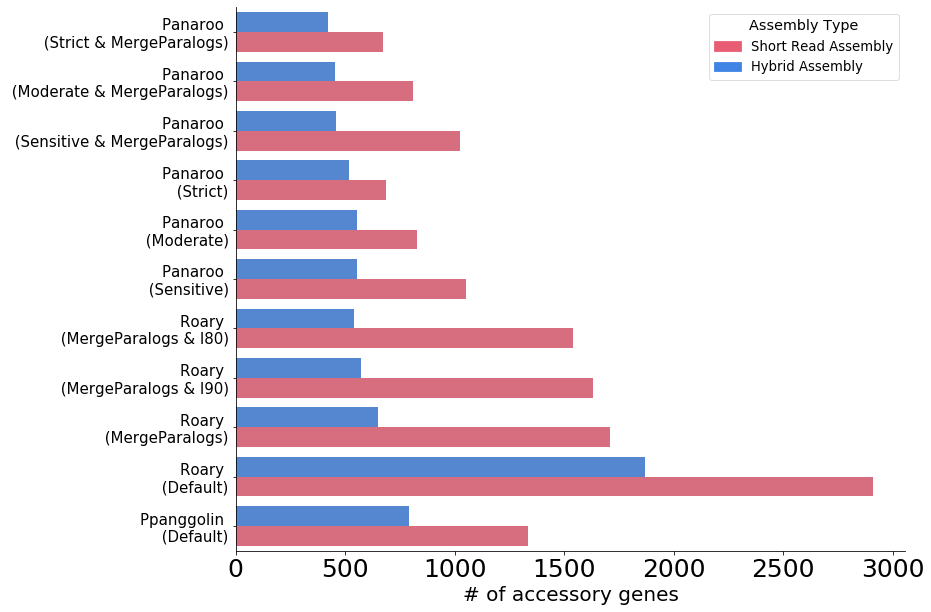

In [90]:
fig, axs = plt.subplots(1, 1, figsize= (12, 10), sharex=True)

#sns.set_context("poster")
sns.set_context("paper", font_scale=1.5)

orderToPlot_X = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                 'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                 'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default',] # 'Ppanggolin_I95', 'Ppanggolin_I90']


sns.barplot(y = "Method", x = "GeneCount", hue = "SeqType", data = PG_Merged_Stats_LRandSR_Acc_Bakta_DF, order = orderToPlot_X, ax = axs, palette = ["#3F84E5", "#E85D75"] )
#plt.ylim(0, 5000)
# 
#axs.set_ylabel("Pangenome Analysis Pipeline")
axs.set_ylabel("")

axs.set_xlabel("# of accessory genes", fontsize = 20)


Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Moderate & MergeParalogs)',
                 'Panaroo \n (Sensitive & MergeParalogs)', 'Panaroo \n (Strict)',
                 'Panaroo \n (Moderate)', 'Panaroo \n (Sensitive)',  'Roary \n (MergeParalogs & I80)', 'Roary \n (MergeParalogs & I90)',
                 'Roary \n (MergeParalogs)',  'Roary \n (Default)', 'Ppanggolin \n (Default)',] # 'Ppanggolin \n (I95)', 'Ppanggolin \n (I90)',]

axs.set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})

#axs.set_xticklabels(labels = Plot_TickLabels, rotation=45, fontdict = {"fontsize": 12})

SR_patch = mpatches.Patch(color = "#E85D75", label='Short Read Assembly')
Hybrid_patch = mpatches.Patch(color="#3F84E5", label='Hybrid Assembly')

#axs.legend(title = "Assembly Type", labels = ["Hybrid Assembly", "Short Read Assembly"], color = ["#3F84E5", "#E85D75"] )
plt.legend(title = "Assembly Type", handles=[SR_patch, Hybrid_patch])

#axs.set_title("Accessory genome size predictions")
#axs.set_title("Accessory gene counts: Hybrid vs SR assemblies")
sns.despine()
plt.xticks(fontsize=25)
#plt.savefig("Plots/4.PG.AccGeneCounts.SRvsLR.WiBakta.Barplot.png", dpi = 300, bbox_inches="tight")
#plt.savefig("Plots/4.PG.AccGeneCounts.SRvsLR.WiBakta.Barplot.svg", bbox_inches="tight")

#plt.xticks(labels = Plot_TickLabels, rotation=45)
plt.show()

In [91]:
PG_WideSumm_V2_DF.head(2)

,PangenomeTool,SeqType,Anno,Method,Total genes,Core genes,Accessory genes,Weight
6,Panaroo,LongRead,Bakta,Panaroo (Strict & MergeParalogs),4200,3779,421,966.5
26,Panaroo,ShortRead,Bakta,Panaroo (Strict & MergeParalogs),4211,3537,674,966.5


In [92]:
PG_Merged_Stats_LRandSR_Pangenome_DF.head(1)

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
4,Total genes,(0% <= strains <= 100%),4200,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta


In [93]:
PG_Merged_Stats_LRandSR_Acc_DF.head(3)

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,MethodAndTechAndAnno
5,Accessory genes,(0% <= strains < 99%),421,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Panaroo_Strict_MergeParalogs_LongRead_Bakta
5,Accessory genes,(0% <= strains < 99%),455,Bakta,Panaroo_Moderate_MergeParalogs,LongRead,All,Panaroo_Moderate_MergeParalogs_LongRead,Panaroo_Moderate_MergeParalogs_LongRead_Bakta
5,Accessory genes,(0% <= strains < 99%),456,Bakta,Panaroo_Sensitive_MergeParalogs,LongRead,All,Panaroo_Sensitive_MergeParalogs_LongRead,Panaroo_Sensitive_MergeParalogs_LongRead_Bakta


# Let's try a 4-way comparison of SeqType & Anno Method

In [94]:
dictOf_PG_OutInfo.keys()

dict_keys(['All'])

In [95]:
dictOf_PG_OutInfo["All"].keys() 

dict_keys(['Bakta', 'PGAP'])

In [96]:
dictOf_PG_OutInfo["All"]["PGAP"].keys() 

dict_keys(['LongRead', 'ShortRead'])

In [97]:
dictOf_PG_OutInfo["All"]["PGAP"]["LongRead"].keys() 

dict_keys(['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs', 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict', 'Panaroo_Moderate', 'Panaroo_Sensitive', 'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90', 'Roary_NoSplitParalogs', 'Roary_Default', 'Ppanggolin_Default'])

In [98]:
dictOf_PG_OutInfo["All"]["PGAP"]["ShortRead"].keys() 

dict_keys(['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs', 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict', 'Panaroo_Moderate', 'Panaroo_Sensitive', 'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90', 'Roary_NoSplitParalogs', 'Roary_Default', 'Ppanggolin_Default'])

# 1) Merge all Pan-genome counts accross all combinations evaluated

In [99]:

PipeName_WiParam_List = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                 'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                 'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default',] # 'Ppanggolin_I95', 'Ppanggolin_I90']


listOf_PG_InfoDFs = []
for i_SampleSet in ["All"]: # "HighBUSCOIsolates"
    for AnnoPipeline in ["Bakta", "PGAP"]:
        for AsmTech in ["LongRead", "ShortRead"]:
            for i_PipeNameWiParam in PipeName_WiParam_List:

                #if (AsmTech == "ShortRead") and (AnnoPipeline == "PGAP"): continue
                    #print("Remove - ", AnnoPipeline, AsmTech, i_PipeNameWiParam)
                
                #print(AnnoPipeline, AsmTech, i_PipeNameWiParam)
                
                i_PG_Stats_DF = dictOf_PG_OutInfo[i_SampleSet][AnnoPipeline][AsmTech][i_PipeNameWiParam]
                
                listOf_PG_InfoDFs.append(i_PG_Stats_DF)

PG_Merged_Stats_SeqAndAnnoType_DF = pd.concat(listOf_PG_InfoDFs)

PG_Merged_Stats_SeqAndAnnoType_DF["MethodAndTech"] = PG_Merged_Stats_SeqAndAnnoType_DF["Method"] + "_" +PG_Merged_Stats_SeqAndAnnoType_DF["SeqType"]
PG_Merged_Stats_SeqAndAnnoType_DF["AnnoAndTech"] = PG_Merged_Stats_SeqAndAnnoType_DF["Annotation"] + "-" +PG_Merged_Stats_SeqAndAnnoType_DF["SeqType"]

PG_Merged_Stats_SeqAndAnnoType_DF["PangenomeTool"] = PG_Merged_Stats_SeqAndAnnoType_DF["Method"].str.split("_").str[0]

PG_Merged_Stats_SeqAndAnnoType_DF.shape


(132, 10)

In [100]:
PG_Merged_Stats_SeqAndAnnoType_DF.head(2)

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,AnnoAndTech,PangenomeTool
0,Core genes,(99% <= strains <= 100%),3779,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Bakta-LongRead,Panaroo
4,Total genes,(0% <= strains <= 100%),4200,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Bakta-LongRead,Panaroo


In [101]:
PG_Merged_Stats_SeqAndAnnoType_DF["Category"].unique()

array(['Core genes', 'Total genes', 'Accessory genes'], dtype=object)

In [102]:
PG_Merged_Stats_SeqAndAnnoType_Total_DF = PG_Merged_Stats_SeqAndAnnoType_DF.query("Category == 'Total genes' ")  
PG_Merged_Stats_SeqAndAnnoType_Total_DF.shape

(44, 10)

In [103]:
PG_Merged_Stats_SeqAndAnnoType_Core_DF = PG_Merged_Stats_SeqAndAnnoType_DF.query("Category == 'Core genes' ")
PG_Merged_Stats_SeqAndAnnoType_Core_DF.shape

(44, 10)

In [104]:
PG_Merged_Stats_SeqAndAnnoType_Acc_DF = PG_Merged_Stats_SeqAndAnnoType_DF.query("Category == 'Accessory genes' ")
PG_Merged_Stats_SeqAndAnnoType_Acc_DF.shape  

(44, 10)

In [105]:
PG_Merged_Stats_SeqAndAnnoType_Acc_DF["AnnoAndTech"].value_counts()

Bakta-LongRead     11
Bakta-ShortRead    11
PGAP-LongRead      11
PGAP-ShortRead     11
Name: AnnoAndTech, dtype: int64

In [106]:
!mkdir Results3_Plots/

mkdir: cannot create directory ‘Results3_Plots/’: File exists


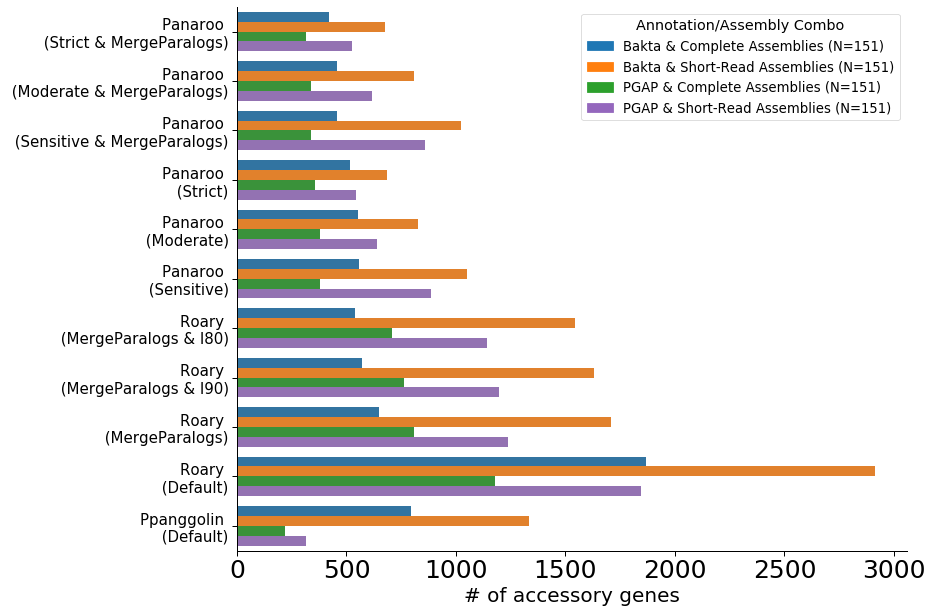

In [107]:
fig, axs = plt.subplots(1, 1, figsize= (12, 10), sharex=True)

#sns.set_context("poster")
sns.set_context("paper", font_scale=1.5)

orderToPlot_X = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                 'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                 'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default',] # 'Ppanggolin_I95', 'Ppanggolin_I90']

Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Moderate & MergeParalogs)',
                 'Panaroo \n (Sensitive & MergeParalogs)', 'Panaroo \n (Strict)',
                 'Panaroo \n (Moderate)', 'Panaroo \n (Sensitive)',  'Roary \n (MergeParalogs & I80)', 'Roary \n (MergeParalogs & I90)',
                 'Roary \n (MergeParalogs)',  'Roary \n (Default)', 'Ppanggolin \n (Default)',] # 'Ppanggolin \n (I95)', 'Ppanggolin \n (I90)',]


AnnoAndTech_hue_Color_Dict = { "Bakta-LongRead": "#1f77b4",
                    "Bakta-ShortRead": "#ff7f0e",
                    "PGAP-LongRead": "#2ca02c",
                    "PGAP-ShortRead": "#9467bd" }


hue_orderToPlot_X = AnnoAndTech_hue_Color_Dict.keys()
pallete_ForPlot = AnnoAndTech_hue_Color_Dict.values()
sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs, palette = pallete_ForPlot )
#plt.ylim(0, 5000)
# 
#axs.set_ylabel("Pangenome Analysis Pipeline")
axs.set_ylabel("")

axs.set_xlabel("# of accessory genes", fontsize = 20)


axs.set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})

#axs.set_xticklabels(labels = Plot_TickLabels, rotation=45, fontdict = {"fontsize": 12})

Bakta_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-LongRead"], label='Bakta & Complete Assemblies (N=151)')
Bakta_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-ShortRead"], label='Bakta & Short-Read Assemblies (N=151)')
PGAP_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-LongRead"], label='PGAP & Complete Assemblies (N=151)')
PGAP_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-ShortRead"], label='PGAP & Short-Read Assemblies (N=151)')

axs.legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch, PGAP_SRAsm_patch])

#axs.set_title("Accessory genome size predictions")
#axs.set_title("Accessory gene counts: Hybrid vs SR assemblies")
sns.despine()
plt.xticks(fontsize=25)


plt.savefig("Results3_Plots/3.PG.AccGeneCounts.SRvsLR.AND.BaktaVsPGAP.CombinedBarplot.png", dpi = 300, bbox_inches="tight")
plt.savefig("Results3_Plots/3.PG.AccGeneCounts.SRvsLR.AND.BaktaVsPGAP.CombinedBarplot.svg", bbox_inches="tight")

#plt.xticks(labels = Plot_TickLabels, rotation=45)
plt.show()

In [113]:
# fig, axs = plt.subplots(3, 1, figsize= (12, 30), sharex=False, sharey=True)
# sns.set_context("poster")



# #sns.barplot(y = "Method", x = "GeneCount", hue = "Annotation", data = PG_Merged_Stats_BaktaVsPGAP_Pangenome_DF, order = orderToPlot_X, ax = axs[0], palette = ["#FF934F", "#A9CBB7"] )

# sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs[0], palette = pallete_ForPlot )
# sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Core_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs[1], palette = pallete_ForPlot )
# sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Total_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs[2], palette = pallete_ForPlot )

# axs[0].set_ylabel("")
# axs[1].set_ylabel(""), axs[2].set_ylabel("")
# axs[0].set_xlabel("# of accessory genes", rotation=0,)
# axs[1].set_xlabel("# of core genes", rotation=0,)
# axs[2].set_xlabel("# of total genes", rotation=0,)


# # For all 3 "ax" set x tick labels
# for i_ax in axs:
#     i_ax.set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 14})

# Bakta_CompAsm_patch = mpatches.Patch(color="#3F84E5", label='Bakta & Complete Assemblies (N=151)')
# Bakta_SRAsm_patch = mpatches.Patch(color = "#E85D75", label='Bakta & Short-Read Assemblies (N=151)')
# PGAP_CompAsm_patch = mpatches.Patch(color="#ADD8E6", label='PGAP & Complete Assemblies (N=151)')
# PGAP_SRAsm_patch = mpatches.Patch(color="#f7bfbe", label='PGAP & Short-Read Assemblies (N=151)')

# axs[0].legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, PGAP_CompAsm_patch, Bakta_SRAsm_patch, PGAP_SRAsm_patch],
#               bbox_to_anchor=(1.75, 1), fontsize= 18) 

# axs[1].get_legend().remove(), axs[2].get_legend().remove()

# axs[0].set_title("Accessory genome size")
# axs[1].set_title("Core genome size")
# axs[2].set_title("Pangenome size (Core + Accessory)")
# sns.despine()
# #plt.tight_layout()
# #plt.xticks(labels = Plot_TickLabels, rotation=45)

# plt.savefig("Results3_Plots/3.PG.Counts.SRvsLR.AND.BaktaVsPGAP.Combined3Barplots.png", dpi = 300, bbox_inches="tight")
# plt.savefig("Results3_Plots/3.PG.Counts.SRvsLR.AND.BaktaVsPGAP.Combined3Barplots.svg", bbox_inches="tight")

# plt.show()

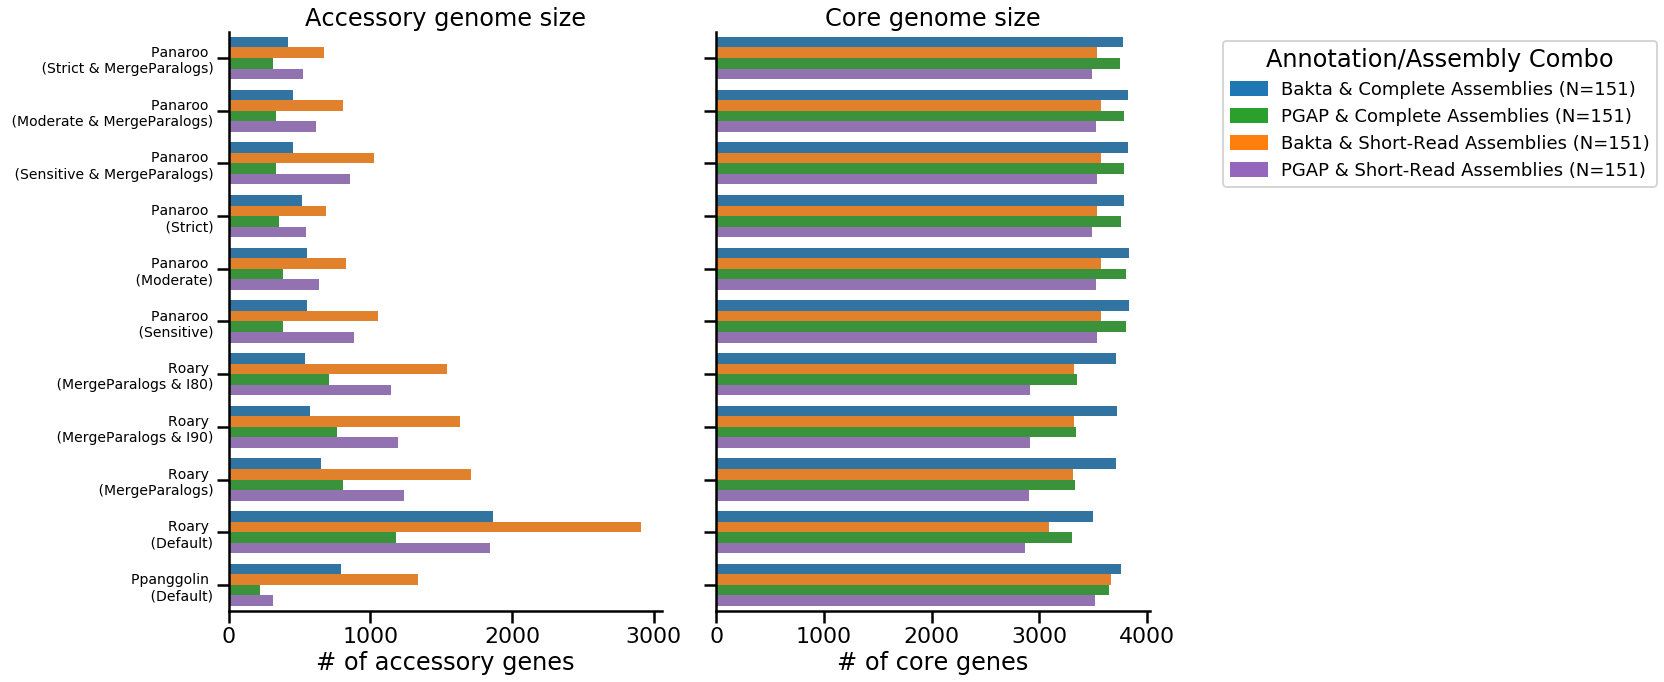

In [117]:
# Change the subplot configuration to 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(24, 10), sharex=False, sharey=True)
sns.set_context("poster")

AnnoAndTech_hue_Color_Dict = { "Bakta-LongRead": "#1f77b4",
                    "Bakta-ShortRead": "#ff7f0e",
                    "PGAP-LongRead": "#2ca02c",
                    "PGAP-ShortRead": "#9467bd" }


# Plotting on the first and second subplot
sns.barplot(y="Method", x="GeneCount", hue="AnnoAndTech", data=PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order=orderToPlot_X, hue_order=hue_orderToPlot_X, ax=axs[0], palette=pallete_ForPlot)
sns.barplot(y="Method", x="GeneCount", hue="AnnoAndTech", data=PG_Merged_Stats_SeqAndAnnoType_Core_DF, order=orderToPlot_X, hue_order=hue_orderToPlot_X, ax=axs[1], palette=pallete_ForPlot)

# Set labels
axs[0].set_ylabel("") # Adjust as needed
axs[1].set_ylabel("") # Adjust as needed

axs[0].set_xlabel("# of accessory genes", rotation=0)
axs[1].set_xlabel("# of core genes", rotation=0)

# Set tick labels
for i_ax in axs:
    i_ax.set_yticklabels(labels=Plot_TickLabels, rotation=0, fontdict={"fontsize": 14})

Bakta_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-LongRead"], label='Bakta & Complete Assemblies (N=151)')
Bakta_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-ShortRead"], label='Bakta & Short-Read Assemblies (N=151)')
PGAP_CompAsm_patch = mpatches.Patch(color=AnnoAndTech_hue_Color_Dict["PGAP-LongRead"], label='PGAP & Complete Assemblies (N=151)')
PGAP_SRAsm_patch = mpatches.Patch(color=AnnoAndTech_hue_Color_Dict["PGAP-ShortRead"], label='PGAP & Short-Read Assemblies (N=151)')

axs[1].legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, PGAP_CompAsm_patch, Bakta_SRAsm_patch, PGAP_SRAsm_patch],
              bbox_to_anchor=(1.15, 1), fontsize= 18) 
axs[0].get_legend().remove(), 


# Set titles
axs[0].set_title("Accessory genome size")
axs[1].set_title("Core genome size")

# Despine and layout adjustment
sns.despine()
plt.tight_layout()

plt.savefig("Results3_Plots/3.PG.Counts.SRvsLR.AND.BaktaVsPGAP.CombinedCoreAccPlots.png", dpi = 300, bbox_inches="tight")
plt.savefig("Results3_Plots/3.PG.Counts.SRvsLR.AND.BaktaVsPGAP.CombinedCoreAccPlots.svg", bbox_inches="tight")

plt.show()

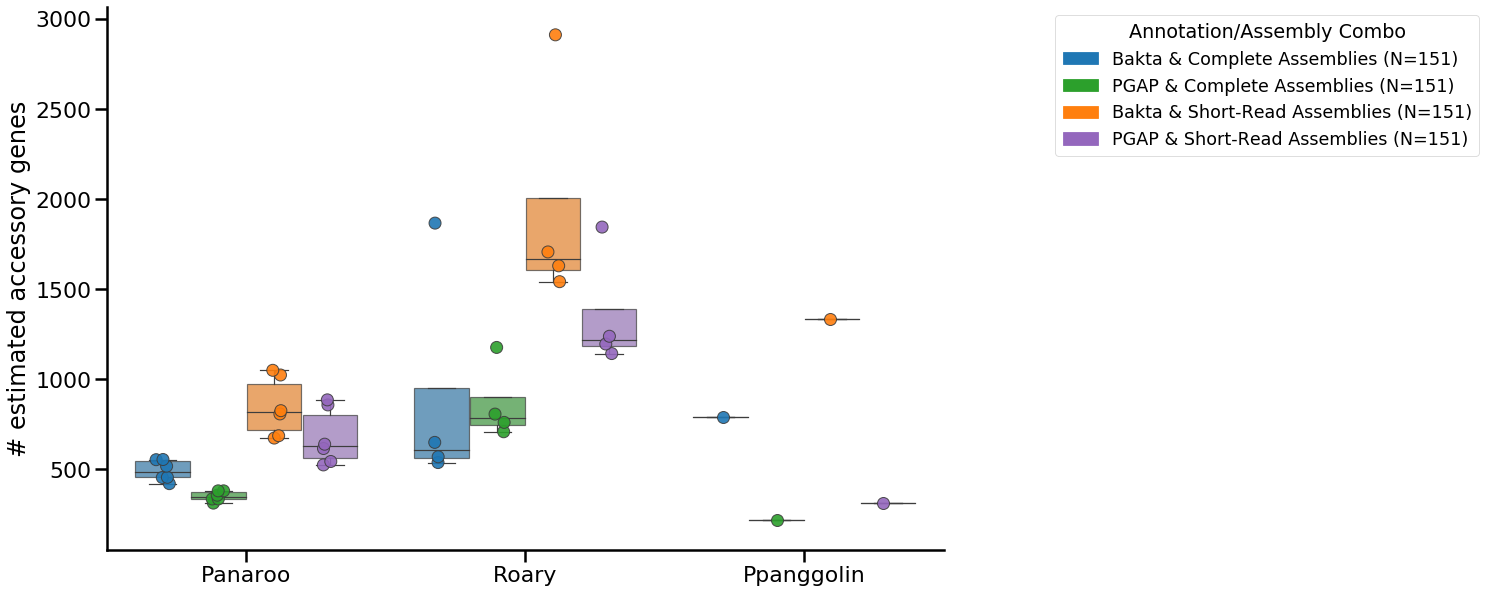

In [110]:
AnnoAndTech_hue_Color_Dict = { "Bakta-LongRead": "#1f77b4",
                    "Bakta-ShortRead": "#ff7f0e",
                    "PGAP-LongRead": "#2ca02c",
                    "PGAP-ShortRead": "#9467bd" }


fig, axs = plt.subplots(1, 1, figsize= (15, 10), sharey = False)
#sns.set_context("poster")
sns.set_context("paper", font_scale=2)


hue_orderToPlot_V2 = ["Bakta-LongRead",  "PGAP-LongRead", "Bakta-ShortRead", "PGAP-ShortRead"]

sns.stripplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, linewidth=1, size = 12, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2, #order = orderToPlot_X, hue_order = hue_orderToPlot_X,
              alpha=0.9, dodge = True, edgecolor='gray', ax= axs)

sns.boxplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, fliersize=0, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2,
            ax= axs, boxprops=dict(alpha=0.7) )


Bakta_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-LongRead"], label='Bakta & Complete Assemblies (N=151)')
Bakta_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-ShortRead"], label='Bakta & Short-Read Assemblies (N=151)')
PGAP_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-LongRead"], label='PGAP & Complete Assemblies (N=151)')
PGAP_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-ShortRead"], label='PGAP & Short-Read Assemblies (N=151)')


axs.legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, PGAP_CompAsm_patch, Bakta_SRAsm_patch, PGAP_SRAsm_patch], bbox_to_anchor=(1.65, 1))

#axs.legend(handles=[CompleteAsm_patch, SRAsm_patch], bbox_to_anchor=(0.75 , 1))

#axs.set_title("Predicted Accessory genome size", fontsize= 20)

#axs.set_ylabel("Predicted # accessory genes", fontsize= 20), 
# For all 3 "ax" set x tick labels

#axs.set_xticklabels(labels = ["Complete Assembly", "Short Read Assembly"], fontsize = 18)

#axs.set_ylim(0, 6250)
axs.set_xlabel("")
axs.set_ylabel("# estimated accessory genes")

#axs.get_legend().remove()

sns.despine()
#plt.savefig("Plots/4.PG.AllCounts.SRvsLR.WiBakta.Boxplots.png", dpi = 300)
#plt.savefig("Plots/4.PG.AllCounts.SRvsLR.WiBakta.Boxplots.svg")  
 
#CompleteAsm_patch = mpatches.Patch(color="#1D6CAB", label='Complete Assemblies')
#SRAsm_patch = mpatches.Patch(color = "#FF7410", label='Short-Read Assemblies')


#axs.legend( handles=[CompleteAsm_patch, SRAsm_patch], bbox_to_anchor=(0.75 , 1))
plt.show()

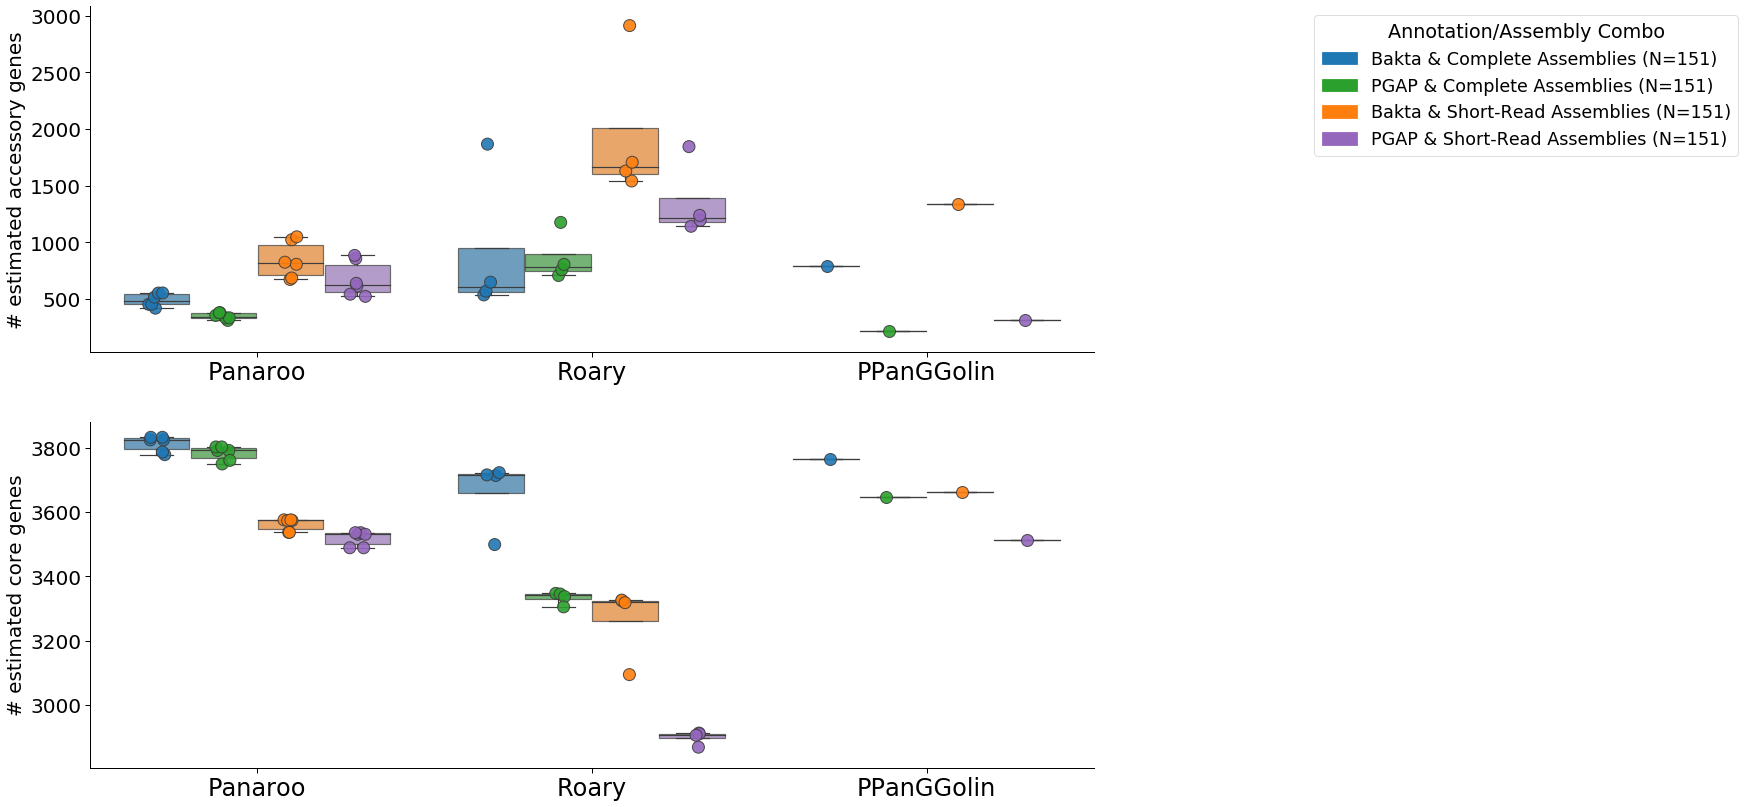

In [111]:
# AnnoAndTech_hue_Color_Dict = { "Bakta-LongRead": "#3F84E5",
#                     "Bakta-ShortRead": "#E85D75",
#                     "PGAP-LongRead": "#ADD8E6",
#                     "PGAP-ShortRead": "#f7bfbe" }

AnnoAndTech_hue_Color_Dict = { "Bakta-LongRead": "#1f77b4",
                    "Bakta-ShortRead": "#ff7f0e",
                    "PGAP-LongRead": "#2ca02c",
                    "PGAP-ShortRead": "#9467bd" }



fig, axs = plt.subplots(2, 1, figsize= (18, 14), sharey = False)
#sns.set_context("poster")
sns.set_context("paper", font_scale=2)


hue_orderToPlot_V2 = ["Bakta-LongRead",  "PGAP-LongRead", "Bakta-ShortRead", "PGAP-ShortRead"]

sns.stripplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, linewidth=1, size = 12, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2, 
              alpha=0.9, dodge = True, edgecolor='gray', ax= axs[0])

sns.boxplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, fliersize=0, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2,
            ax= axs[0], boxprops=dict(alpha=0.7) )


sns.stripplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Core_DF, linewidth=1, size = 12, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2, 
              alpha=0.9, dodge = True, edgecolor='gray', ax= axs[1])

sns.boxplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Core_DF, fliersize=0, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2,
            ax= axs[1], boxprops=dict(alpha=0.7) )


Bakta_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-LongRead"], label='Bakta & Complete Assemblies (N=151)')
Bakta_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-ShortRead"], label='Bakta & Short-Read Assemblies (N=151)')
PGAP_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-LongRead"], label='PGAP & Complete Assemblies (N=151)')
PGAP_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-ShortRead"], label='PGAP & Short-Read Assemblies (N=151)')

axs[0].legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, PGAP_CompAsm_patch, Bakta_SRAsm_patch, PGAP_SRAsm_patch], bbox_to_anchor=(1.65, 1))
axs[1].get_legend().remove()

axs[0].set_xlabel("")
axs[1].set_xlabel("")

axs[0].set_ylabel("# estimated accessory genes", fontsize=20)
axs[1].set_ylabel("# estimated core genes", fontsize=20)

axs[0].set_xticklabels(labels = ["Panaroo", "Roary", "PPanGGolin"], fontsize = 24)
axs[1].set_xticklabels(labels = ["Panaroo", "Roary", "PPanGGolin"], fontsize = 24)

axs[0].set_yticklabels(axs[0].get_yticks().astype(int), fontsize=20)
axs[1].set_yticklabels(axs[1].get_yticks().astype(int), fontsize=20)

sns.despine()

plt.savefig("Results3_Plots/3.PG.Counts.OverallCounts.Boxplots.png", dpi = 300, bbox_inches="tight")
plt.savefig("Results3_Plots/3.PG.Counts.OverallCounts.Boxplots.svg", bbox_inches="tight")

plt.show()

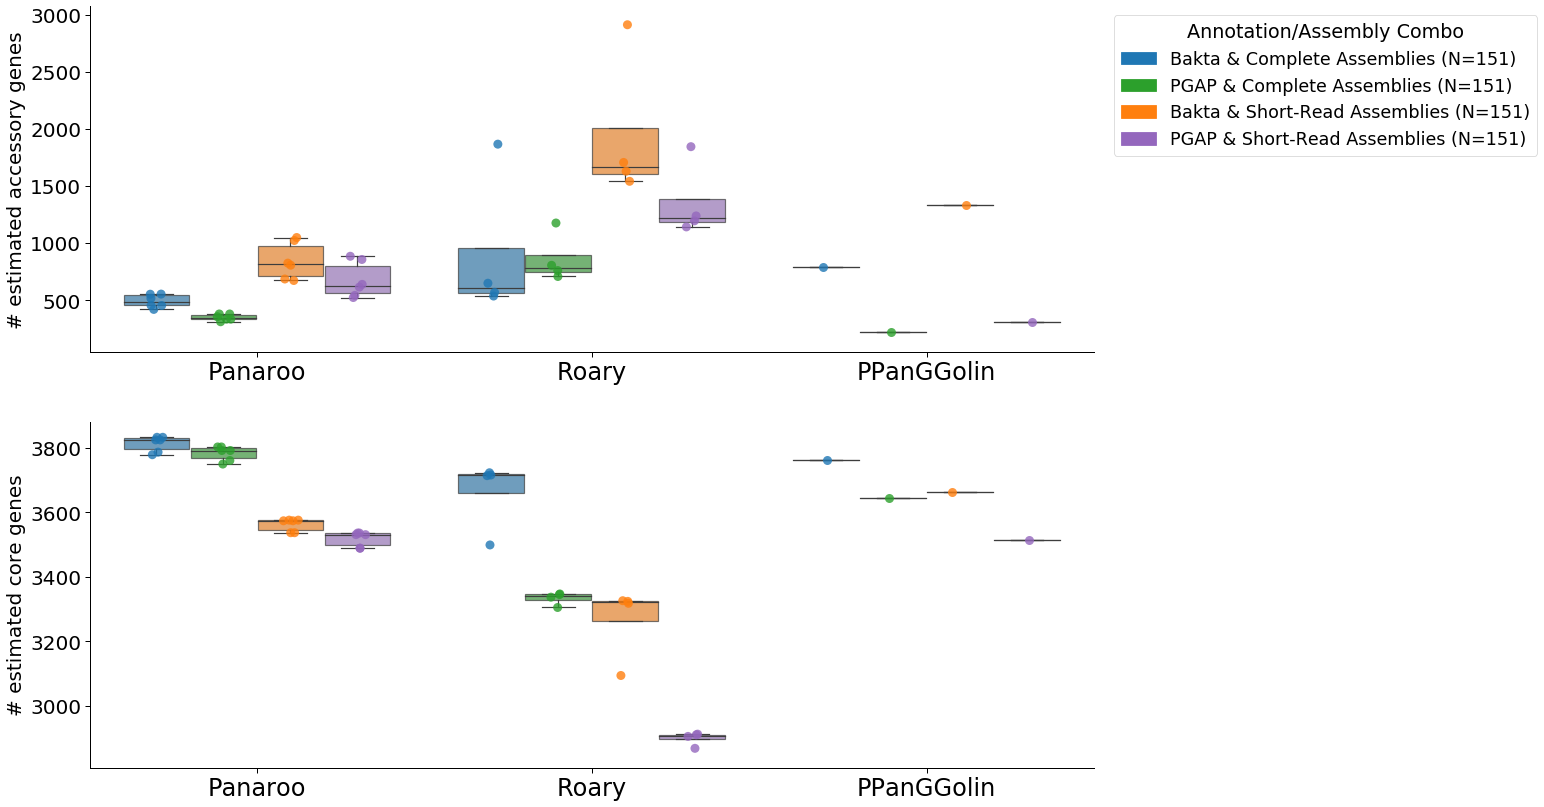

In [126]:
# AnnoAndTech_hue_Color_Dict = { "Bakta-LongRead": "#3F84E5",
#                     "Bakta-ShortRead": "#E85D75",
#                     "PGAP-LongRead": "#ADD8E6",
#                     "PGAP-ShortRead": "#f7bfbe" }

AnnoAndTech_hue_Color_Dict = { "Bakta-LongRead": "#1f77b4",
                    "Bakta-ShortRead": "#ff7f0e",
                    "PGAP-LongRead": "#2ca02c",
                    "PGAP-ShortRead": "#9467bd" }



fig, axs = plt.subplots(2, 1, figsize= (18, 14), sharey = False)
#sns.set_context("poster")
sns.set_context("paper", font_scale=2)


hue_orderToPlot_V2 = ["Bakta-LongRead",  "PGAP-LongRead", "Bakta-ShortRead", "PGAP-ShortRead"]

sns.stripplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, 
              linewidth=0, size = 9, alpha=0.8, marker='o',
              palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2,  dodge = True, edgecolor='gray', ax= axs[0])

sns.boxplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, fliersize=0, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2,
            ax= axs[0], boxprops=dict(alpha=0.7) )


sns.stripplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Core_DF,
              linewidth=0, size = 9, alpha=0.8, marker='o',
              palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2,  dodge = True, edgecolor='gray', ax= axs[1])

sns.boxplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Core_DF,
            fliersize=0, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2,
            ax= axs[1], boxprops=dict(alpha=0.7) )


Bakta_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-LongRead"], label='Bakta & Complete Assemblies (N=151)')
Bakta_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-ShortRead"], label='Bakta & Short-Read Assemblies (N=151)')
PGAP_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-LongRead"], label='PGAP & Complete Assemblies (N=151)')
PGAP_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-ShortRead"], label='PGAP & Short-Read Assemblies (N=151)')

axs[0].legend(title = "Annotation/Assembly Combo",
              handles=[Bakta_CompAsm_patch, PGAP_CompAsm_patch, Bakta_SRAsm_patch, PGAP_SRAsm_patch],
              bbox_to_anchor=(1.45, 1))
axs[1].get_legend().remove()

axs[0].set_xlabel("")
axs[1].set_xlabel("")

axs[0].set_ylabel("# estimated accessory genes", fontsize=20)
axs[1].set_ylabel("# estimated core genes", fontsize=20)

axs[0].set_xticklabels(labels = ["Panaroo", "Roary", "PPanGGolin"], fontsize = 24)
axs[1].set_xticklabels(labels = ["Panaroo", "Roary", "PPanGGolin"], fontsize = 24)

axs[0].set_yticklabels(axs[0].get_yticks().astype(int), fontsize=20)
axs[1].set_yticklabels(axs[1].get_yticks().astype(int), fontsize=20)

sns.despine()

#plt.savefig("Results3_Plots/3.PG.Counts.OverallCounts.Boxplots.png", dpi = 300, bbox_inches="tight")
#plt.savefig("Results3_Plots/3.PG.Counts.OverallCounts.Boxplots.svg", bbox_inches="tight")

plt.show()

In [112]:
PG_Merged_Stats_SeqAndAnnoType_Acc_DF.head(5)

,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,AnnoAndTech,PangenomeTool
5,Accessory genes,(0% <= strains < 99%),421,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Bakta-LongRead,Panaroo
5,Accessory genes,(0% <= strains < 99%),455,Bakta,Panaroo_Moderate_MergeParalogs,LongRead,All,Panaroo_Moderate_MergeParalogs_LongRead,Bakta-LongRead,Panaroo
5,Accessory genes,(0% <= strains < 99%),456,Bakta,Panaroo_Sensitive_MergeParalogs,LongRead,All,Panaroo_Sensitive_MergeParalogs_LongRead,Bakta-LongRead,Panaroo
5,Accessory genes,(0% <= strains < 99%),518,Bakta,Panaroo_Strict,LongRead,All,Panaroo_Strict_LongRead,Bakta-LongRead,Panaroo
5,Accessory genes,(0% <= strains < 99%),554,Bakta,Panaroo_Moderate,LongRead,All,Panaroo_Moderate_LongRead,Bakta-LongRead,Panaroo


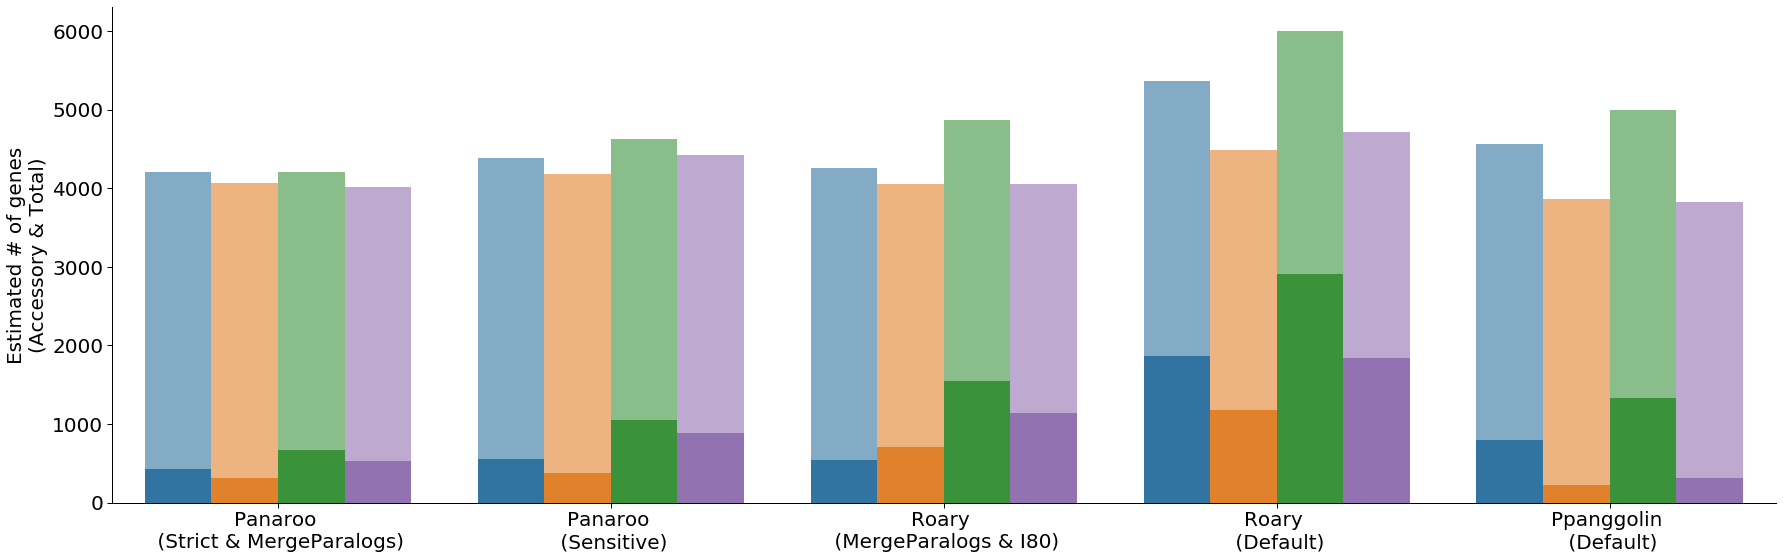

In [113]:
# Set the context for the plot
sns.set_context("paper", font_scale=1.5)
#sns.set_context("poster")

orderToPlot_X = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_Default', 'Ppanggolin_Default',]

Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Sensitive)',  'Roary \n (MergeParalogs & I80)', 'Roary \n (Default)', 'Ppanggolin \n (Default)',]

# Create a subplot
fig, ax = plt.subplots(figsize=(25, 8))

# Create the barplot
sns.barplot(x = "Method", y="GeneCount", hue="AnnoAndTech", data=PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order=orderToPlot_X, hue_order=hue_orderToPlot_V2, ax=ax, palette=pallete_ForPlot)
sns.barplot(x = "Method", y = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Total_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_V2, alpha = 0.6, ax = ax, palette = pallete_ForPlot )

# Set the y-tick labels
Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Sensitive)',
                   'Roary \n (MergeParalogs & I80)', 'Roary \n (Default)', 'Ppanggolin \n (Default)',]

ax.set_xticklabels(labels=Plot_TickLabels, rotation=0, fontdict={"fontsize": 20})

# Set the x-axis label
ax.set_ylabel("Estimated # of genes\n(Accessory & Total)", fontsize=20)

# Set the ylabel to empty since it's removed in your original code
ax.set_xlabel("")

# Optionally, you can add a legend if needed
#ax.legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch, PGAP_SRAsm_patch], bbox_to_anchor=(1.3, 1))
ax.get_legend().remove()

ax.set_yticklabels(ax.get_yticks().astype(int), fontsize=20)

# Adjust the layout and remove the right and top spines
plt.tight_layout()
sns.despine()

plt.savefig("Results3_Plots/3.PG.Counts.SelectedToolParams.Barplots.png", dpi = 300, bbox_inches="tight")
plt.savefig("Results3_Plots/3.PG.Counts.SelectedToolParams.Barplots.svg", bbox_inches="tight")

# Display the plot
plt.show()

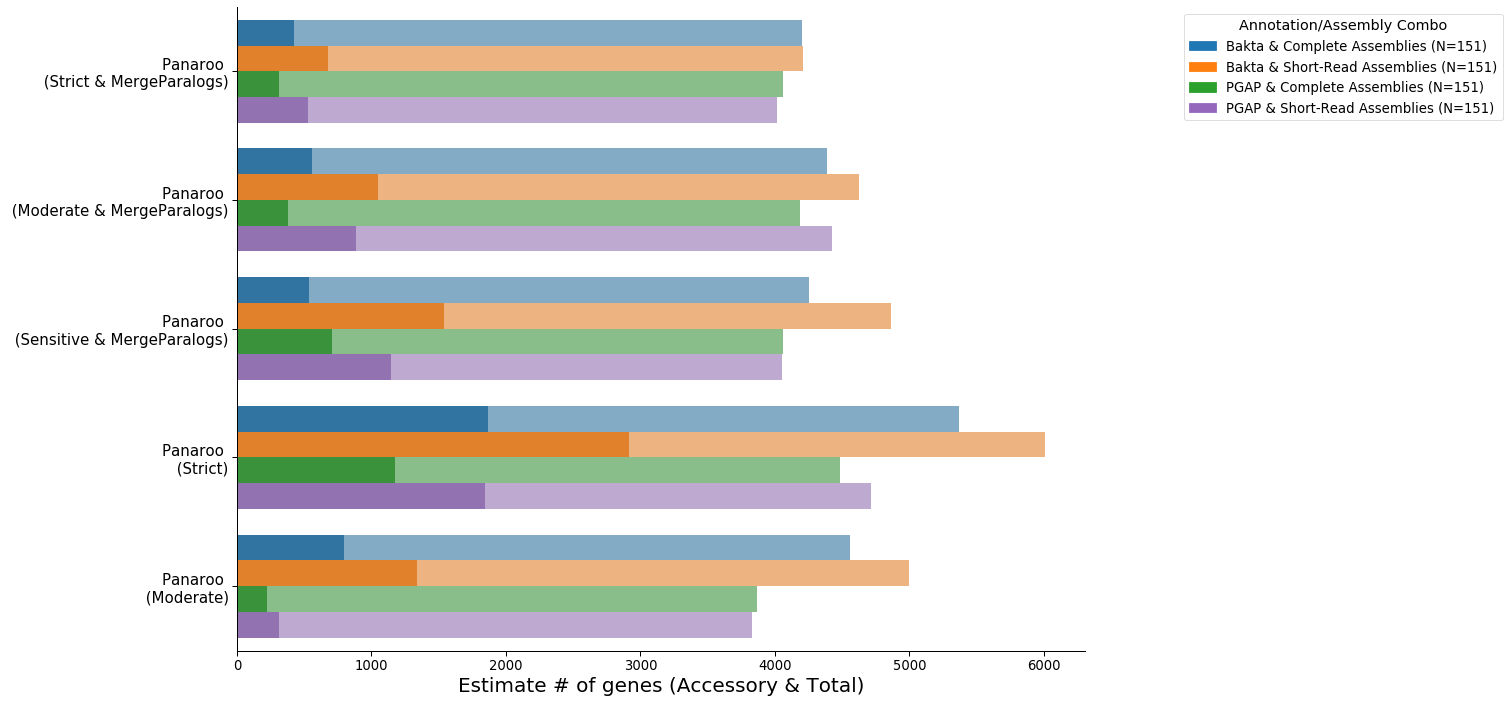

In [114]:
# Set the context for the plot
sns.set_context("paper", font_scale=1.5)
#sns.set_context("poster")

# Create a subplot
fig, ax = plt.subplots(figsize=(25, 10))

# Create the barplot
sns.barplot(y="Method", x="GeneCount", hue="AnnoAndTech", data=PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order=orderToPlot_X, hue_order=hue_orderToPlot_X, ax=ax, palette=pallete_ForPlot)
sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Total_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, alpha = 0.6, ax = ax, palette = pallete_ForPlot )

# Set the y-tick labels
Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Moderate & MergeParalogs)',
                   'Panaroo \n (Sensitive & MergeParalogs)', 'Panaroo \n (Strict)',
                   'Panaroo \n (Moderate)', 'Panaroo \n (Sensitive)',  'Roary \n (MergeParalogs & I80)', 'Roary \n (MergeParalogs & I90)',
                   'Roary \n (MergeParalogs)',  'Roary \n (Default)', 'Ppanggolin \n (Default)',]
ax.set_yticklabels(labels=Plot_TickLabels, rotation=0, fontdict={"fontsize": 15})

# Set the x-axis label
ax.set_xlabel("Estimate # of genes (Accessory & Total)", fontsize=20)

# Set the ylabel to empty since it's removed in your original code
ax.set_ylabel("")

# Optionally, you can add a legend if needed
ax.legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch, PGAP_SRAsm_patch], bbox_to_anchor=(1.5, 1))

# Adjust the layout and remove the right and top spines
plt.tight_layout()
sns.despine()

# Display the plot
plt.show()

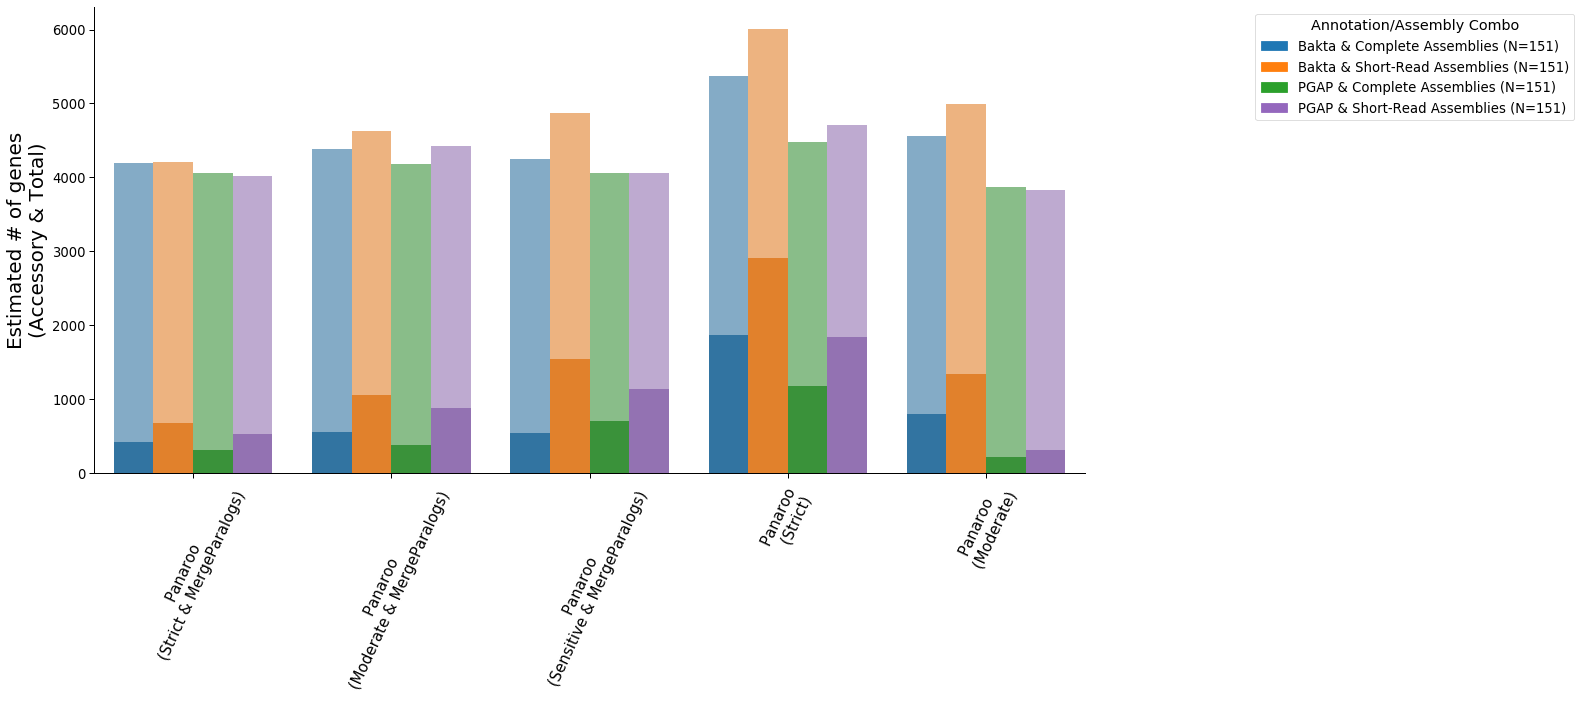

In [123]:
# Set the context for the plot
sns.set_context("paper", font_scale=1.5)
#sns.set_context("poster")


# Create a subplot
fig, ax = plt.subplots(figsize=(25, 10))

# Create the barplot
sns.barplot(x = "Method", y="GeneCount", hue="AnnoAndTech", data=PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order=orderToPlot_X, hue_order=hue_orderToPlot_X, ax=ax, palette=pallete_ForPlot)
sns.barplot(x = "Method", y = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Total_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, alpha = 0.6, ax = ax, palette = pallete_ForPlot )

# Set the y-tick labels
Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Moderate & MergeParalogs)',
                   'Panaroo \n (Sensitive & MergeParalogs)', 'Panaroo \n (Strict)',
                   'Panaroo \n (Moderate)', 'Panaroo \n (Sensitive)',  'Roary \n (MergeParalogs & I80)', 'Roary \n (MergeParalogs & I90)',
                   'Roary \n (MergeParalogs)',  'Roary \n (Default)', 'Ppanggolin \n (Default)',]
ax.set_xticklabels(labels=Plot_TickLabels, rotation=65, fontdict={"fontsize": 15})

# Set the x-axis label
ax.set_ylabel("Estimated # of genes\n(Accessory & Total)", fontsize=20)

# Set the ylabel to empty since it's removed in your original code
ax.set_xlabel("")

# Optionally, you can add a legend if needed
ax.legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch, PGAP_SRAsm_patch], bbox_to_anchor=(1.5, 1))

# Adjust the layout and remove the right and top spines
plt.tight_layout()
sns.despine()

# Display the plot
plt.show()

In [116]:
#PG_Merged_Stats_SeqAndAnnoType_Acc_DF

# Viz Explore - V2

In [117]:
PG_Merged_Stats_SeqAndAnnoType_Acc_DF.head(4)


,Category,Range,GeneCount,Annotation,Method,SeqType,DataSet,MethodAndTech,AnnoAndTech,PangenomeTool
5,Accessory genes,(0% <= strains < 99%),421,Bakta,Panaroo_Strict_MergeParalogs,LongRead,All,Panaroo_Strict_MergeParalogs_LongRead,Bakta-LongRead,Panaroo
5,Accessory genes,(0% <= strains < 99%),455,Bakta,Panaroo_Moderate_MergeParalogs,LongRead,All,Panaroo_Moderate_MergeParalogs_LongRead,Bakta-LongRead,Panaroo
5,Accessory genes,(0% <= strains < 99%),456,Bakta,Panaroo_Sensitive_MergeParalogs,LongRead,All,Panaroo_Sensitive_MergeParalogs_LongRead,Bakta-LongRead,Panaroo
5,Accessory genes,(0% <= strains < 99%),518,Bakta,Panaroo_Strict,LongRead,All,Panaroo_Strict_LongRead,Bakta-LongRead,Panaroo


In [118]:
PG_Merged_Stats_SeqAndAnnoType_Acc_DF["PangenomeTool"].value_counts()

Panaroo       24
Roary         16
Ppanggolin     4
Name: PangenomeTool, dtype: int64

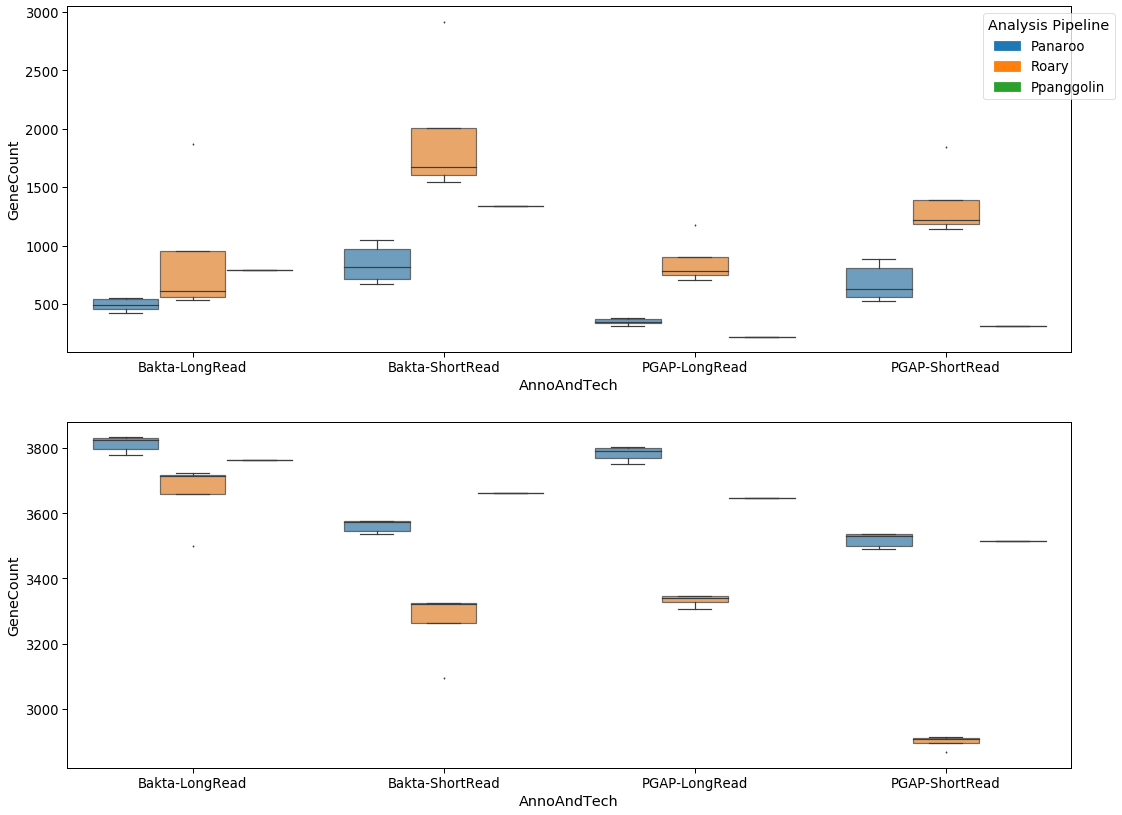

In [131]:
# Set the context for the plot
sns.set_context("paper", font_scale=1.5)
#sns.set_context("poster")

# Create a subplot
fig, axs = plt.subplots(2, 1, figsize= (18, 14), sharey = False)


Tools_hue_Color_Dict = { "Panaroo": "#1f77b4",
                    "Roary": "#ff7f0e",
                    "Ppanggolin": "#2ca02c" }


hue_Order_Tools = ["Panaroo", "Roary", "Ppanggolin"]


sns.stripplot(y = "GeneCount", x = "AnnoAndTech", hue = "PangenomeTool", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, linewidth=1, size = 12, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2, 
              alpha=0.9, dodge = True, edgecolor='gray', ax= axs[0])

sns.boxplot(y = "GeneCount", x = "AnnoAndTech", hue = "PangenomeTool", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, fliersize=0, hue_order = hue_Order_Tools,
            ax= axs[0], boxprops=dict(alpha=0.7) )

sns.stripplot(y = "GeneCount", x = "AnnoAndTech", hue = "PangenomeTool", data = PG_Merged_Stats_SeqAndAnnoType_Core_DF, linewidth=1, size = 12, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2, 
              alpha=0.9, dodge = True, edgecolor='gray', ax= axs[1])

sns.boxplot(y = "GeneCount", x = "AnnoAndTech", hue = "PangenomeTool", data = PG_Merged_Stats_SeqAndAnnoType_Core_DF, fliersize=0, hue_order = hue_Order_Tools,
            ax= axs[1], boxprops=dict(alpha=0.7) )


Panaroo_patch = mpatches.Patch(color = Tools_hue_Color_Dict["Panaroo"], label='Panaroo')
Roary_patch = mpatches.Patch(color = Tools_hue_Color_Dict["Roary"], label='Roary')
Ppanggolin_patch = mpatches.Patch(color = Tools_hue_Color_Dict["Ppanggolin"], label='Ppanggolin')

axs[0].legend(title = "Analysis Pipeline", handles=[Panaroo_patch, Roary_patch, Ppanggolin_patch], bbox_to_anchor=(1.05, 1))
axs[1].get_legend().remove()


plt.show()


In [ ]:
# AnnoAndTech_hue_Color_Dict = { "Bakta-LongRead": "#3F84E5",
#                     "Bakta-ShortRead": "#E85D75",
#                     "PGAP-LongRead": "#ADD8E6",
#                     "PGAP-ShortRead": "#f7bfbe" }

AnnoAndTech_hue_Color_Dict = { "Bakta-LongRead": "#1f77b4",
                    "Bakta-ShortRead": "#ff7f0e",
                    "PGAP-LongRead": "#2ca02c",
                    "PGAP-ShortRead": "#9467bd" }



fig, axs = plt.subplots(2, 1, figsize= (18, 14), sharey = False)
#sns.set_context("poster")
sns.set_context("paper", font_scale=2)


hue_orderToPlot_V2 = ["Bakta-LongRead",  "PGAP-LongRead", "Bakta-ShortRead", "PGAP-ShortRead"]

sns.stripplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, linewidth=1, size = 12, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2, 
              alpha=0.9, dodge = True, edgecolor='gray', ax= axs[0])

sns.boxplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, fliersize=0, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2,
            ax= axs[0], boxprops=dict(alpha=0.7) )


sns.stripplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Core_DF, linewidth=1, size = 12, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2, 
              alpha=0.9, dodge = True, edgecolor='gray', ax= axs[1])

sns.boxplot(y = "GeneCount", x = "PangenomeTool", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Core_DF, fliersize=0, palette = AnnoAndTech_hue_Color_Dict, hue_order = hue_orderToPlot_V2,
            ax= axs[1], boxprops=dict(alpha=0.7) )


Bakta_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-LongRead"], label='Bakta & Complete Assemblies (N=151)')
Bakta_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["Bakta-ShortRead"], label='Bakta & Short-Read Assemblies (N=151)')
PGAP_CompAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-LongRead"], label='PGAP & Complete Assemblies (N=151)')
PGAP_SRAsm_patch = mpatches.Patch(color = AnnoAndTech_hue_Color_Dict["PGAP-ShortRead"], label='PGAP & Short-Read Assemblies (N=151)')

axs[0].legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, PGAP_CompAsm_patch, Bakta_SRAsm_patch, PGAP_SRAsm_patch], bbox_to_anchor=(1.65, 1))
axs[1].get_legend().remove()

axs[0].set_xlabel("")
axs[1].set_xlabel("")

axs[0].set_ylabel("# estimated accessory genes", fontsize=20)
axs[1].set_ylabel("# estimated core genes", fontsize=20)

axs[0].set_xticklabels(labels = ["Panaroo", "Roary", "PPanGGolin"], fontsize = 24)
axs[1].set_xticklabels(labels = ["Panaroo", "Roary", "PPanGGolin"], fontsize = 24)

axs[0].set_yticklabels(axs[0].get_yticks().astype(int), fontsize=20)
axs[1].set_yticklabels(axs[1].get_yticks().astype(int), fontsize=20)

sns.despine()

#plt.savefig("Results3_Plots/3.PG.Counts.OverallCounts.Boxplots.png", dpi = 300, bbox_inches="tight")
#plt.savefig("Results3_Plots/3.PG.Counts.OverallCounts.Boxplots.svg", bbox_inches="tight")

plt.show()

In [116]:
STOP!!!

SyntaxError: invalid syntax (<ipython-input-116-269510821509>, line 1)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize= (15, 8), sharex=True)

#sns.set_context("poster")
sns.set_context("paper", font_scale=1.5)

orderToPlot_X = ['Panaroo_Strict_MergeParalogs',   #'Roary_NoSplitParalogs_I80',
                 'Roary_NoSplitParalogs', 'Ppanggolin_Default',]

hue_orderToPlot_X = ["Bakta-LongRead", "Bakta-ShortRead", "PGAP-LongRead", "PGAP-ShortRead"]
pallete_ForPlot = ["#3F84E5", "#E85D75", "#ADD8E6", "#f7bfbe"]
sns.barplot(x = "Method", y = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs, palette = pallete_ForPlot )
#plt.ylim(0, 5000)
# 
#axs.set_ylabel("Pangenome Analysis Pipeline")
axs.set_xlabel("")

axs.set_ylabel("# of accessory genes", fontsize = 20)


Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)',
                 'Roary \n (MergeParalogs)', 'Ppanggolin \n (Default)',]

axs.set_xticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})

Bakta_CompAsm_patch = mpatches.Patch(color="#3F84E5", label='Bakta & Complete Assemblies (N=158)')
Bakta_SRAsm_patch = mpatches.Patch(color = "#E85D75", label='Bakta & Short-Read Assemblies (N=158)')
PGAP_CompAsm_patch = mpatches.Patch(color="#ADD8E6", label='PGAP & Complete Assemblies (N=158)')
PGAP_SRAsm_patch = mpatches.Patch(color="#f7bfbe", label='PGAP & Short-Read Assemblies (N=158)')

axs.legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch, PGAP_SRAsm_patch])

#axs.set_title("Accessory genome size predictions")
#axs.set_title("Accessory gene counts: Hybrid vs SR assemblies")
sns.despine()
plt.xticks(fontsize=25)

#plt.xticks(labels = Plot_TickLabels, rotation=45)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize= (15, 8), sharex=True)

#sns.set_context("poster")
sns.set_context("paper", font_scale=1.5)

orderToPlot_X = ['Panaroo_Strict_MergeParalogs',   #'Roary_NoSplitParalogs_I80',
                 'Roary_NoSplitParalogs', 'Ppanggolin_Default',]

hue_orderToPlot_X = ["Bakta-LongRead", "Bakta-ShortRead", "PGAP-LongRead", "PGAP-ShortRead"]
pallete_ForPlot = ["#3F84E5", "#E85D75", "#ADD8E6", "#f7bfbe"]
sns.stripplot(x = "Method", y = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs, palette = pallete_ForPlot )
#plt.ylim(0, 5000)
# 
#axs.set_ylabel("Pangenome Analysis Pipeline")
axs.set_xlabel("")

axs.set_ylabel("# of accessory genes", fontsize = 20)


Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)',
                 'Roary \n (MergeParalogs)', 'Ppanggolin \n (Default)',]

axs.set_xticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})

Bakta_CompAsm_patch = mpatches.Patch(color="#3F84E5", label='Bakta & Complete Assemblies (N=158)')
Bakta_SRAsm_patch = mpatches.Patch(color = "#E85D75", label='Bakta & Short-Read Assemblies (N=158)')
PGAP_CompAsm_patch = mpatches.Patch(color="#ADD8E6", label='PGAP & Complete Assemblies (N=158)')
PGAP_SRAsm_patch = mpatches.Patch(color="#f7bfbe", label='PGAP & Short-Read Assemblies (N=158)')

axs.legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch, PGAP_SRAsm_patch])

#axs.set_title("Accessory genome size predictions")
#axs.set_title("Accessory gene counts: Hybrid vs SR assemblies")
sns.despine()
plt.xticks(fontsize=25)

#plt.xticks(labels = Plot_TickLabels, rotation=45)
plt.show()

In [ ]:
PG_WideSumm_V2_DF_Trim.head(4)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize= (28, 6), sharey = False)
sns.set_context("poster")
#sns.set_context("paper", font_scale=1.5)

sns.stripplot(y = "Accessory genes", x = "SeqType", hue = "PangenomeTool", data = PG_WideSumm_V2_DF_Trim, linewidth=1, size = 12, dodge = True, edgecolor='gray', ax= axs )

sns.boxplot(y = "Accessory genes", x = "SeqType", palette = ["grey", "grey"], data = PG_WideSumm_V2_DF_Trim, fliersize=0, ax= axs, boxprops=dict(alpha=0.7) )

axs.set_title("Accessory genome size", fontsize= 20)

axs.set_ylabel("Predicted # genes", fontsize= 20), 
# For all 3 "ax" set x tick labels

axs.set_xticklabels(labels = ["Complete Assembly", "Short Read Assembly"], fontsize = 18)

#axs.set_ylim(0, 6250)
axs.set_xlabel("")

#axs.get_legend().remove()

sns.despine()
#plt.savefig("Plots/4.PG.AllCounts.SRvsLR.WiBakta.Boxplots.png", dpi = 300)
#plt.savefig("Plots/4.PG.AllCounts.SRvsLR.WiBakta.Boxplots.svg")  

#axs[2].legend( bbox_to_anchor=(1.35 , 1))
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize= (15, 10), sharey = False)
sns.set_context("poster")
#sns.set_context("paper", font_scale=1.5)

sns.stripplot(y = "Accessory genes", x = "PangenomeTool", hue = "SeqType", data = PG_WideSumm_V2_DF_Trim, linewidth=1, size = 12, dodge = True, edgecolor='gray', ax= axs )

sns.boxplot(y = "Accessory genes", x = "PangenomeTool", palette = ["grey", "grey"], data = PG_WideSumm_V2_DF_Trim, fliersize=0, ax= axs, boxprops=dict(alpha=0.7) )

axs.set_title("Accessory genome size", fontsize= 20)

axs.set_ylabel("Predicted # genes", fontsize= 20), 
# For all 3 "ax" set x tick labels

#axs.set_xticklabels(labels = ["Complete Assembly", "Short Read Assembly"], fontsize = 18)

#axs.set_ylim(0, 6250)
axs.set_xlabel("")

CompleteAsm_patch = mpatches.Patch(color="#1D6CAB", label='Complete Assemblies (N=158)')
SRAsm_patch = mpatches.Patch(color = "#FF7410", label='Short-Read Assemblies (N=158)')


axs.legend( handles=[CompleteAsm_patch, SRAsm_patch], bbox_to_anchor=(0.85 , 1))




#axs.get_legend().remove()

sns.despine()
#plt.savefig("Plots/4.PG.AllCounts.SRvsLR.WiBakta.Boxplots.png", dpi = 300)
#plt.savefig("Plots/4.PG.AllCounts.SRvsLR.WiBakta.Boxplots.svg")  

#axs[2].legend( bbox_to_anchor=(1.35 , 1))
plt.show()

In [ ]:
PG_WideSumm_V2_DF_Trim.head(5)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize= (15, 10), sharey = False)
sns.set_context("poster")
#sns.set_context("paper", font_scale=1.5)

sns.stripplot(y = "Accessory genes", x = "PangenomeTool", hue = "SeqType", data = PG_WideSumm_V2_DF_Trim, linewidth=1, size = 12, dodge = True, edgecolor='gray', ax= axs )

#axs.set_title("Predicted Accessory genome size", fontsize= 20)

#axs.set_ylabel("Predicted # accessory genes", fontsize= 20), 
# For all 3 "ax" set x tick labels

#axs.set_xticklabels(labels = ["Complete Assembly", "Short Read Assembly"], fontsize = 18)

#axs.set_ylim(0, 6250)
axs.set_xlabel("")
axs.set_ylabel("")

#axs.get_legend().remove()

sns.despine()
#plt.savefig("Plots/4.PG.AllCounts.SRvsLR.WiBakta.Boxplots.png", dpi = 300)
#plt.savefig("Plots/4.PG.AllCounts.SRvsLR.WiBakta.Boxplots.svg")  
 
CompleteAsm_patch = mpatches.Patch(color="#1D6CAB", label='Complete Assemblies')
SRAsm_patch = mpatches.Patch(color = "#FF7410", label='Short-Read Assemblies')


axs.legend( handles=[CompleteAsm_patch, SRAsm_patch], bbox_to_anchor=(0.75 , 1))
plt.show()

In [ ]:
PG_Merged_Stats_SeqAndAnnoType_DF.head()

In [ ]:
PG_Merged_Stats_SeqAndAnnoType_Acc_DF.head()

In [ ]:
PG_WideSumm_V2_DF_Trim.head()

In [ ]:
PG_Merged_Stats_SeqAndAnnoType_Acc_DF.head(4)

In [ ]:
PG_Merged_Stats_SeqAndAnnoType_Acc_DF["Method"].unique()

In [ ]:
ParamsList = ['Panaroo_Strict_MergeParalogs', 'Roary_NoSplitParalogs', 'Roary_Default', 'Ppanggolin_Default']




X = PG_Merged_Stats_SeqAndAnnoType_Acc_DF[PG_Merged_Stats_SeqAndAnnoType_Acc_DF["Method"].isin(ParamsList)]
X_Total = PG_Merged_Stats_SeqAndAnnoType_Total_DF[PG_Merged_Stats_SeqAndAnnoType_Total_DF["Method"].isin(ParamsList)]

In [ ]:
X["Method"].unique()

In [ ]:
X.head(4)
sns.set_palette("Set1")

In [ ]:
fig, axs = plt.subplots(1, 1, figsize= (15, 8), sharex=True)


sns.barplot(x = "AnnoAndTech", y = "GeneCount", hue = "Method", data = X)

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize= (15, 8), sharex=True)


X_order = ["Bakta-ShortRead", "Bakta-LongRead", "PGAP-LongRead"]
Hue_order = ['Panaroo_Strict_MergeParalogs', 'Roary_NoSplitParalogs', 'Roary_Default', 'Ppanggolin_Default']

sns.barplot(x = "AnnoAndTech", y = "GeneCount", hue = "Method", data = X, ax = axs,
            order = X_order, hue_order = Hue_order,
            edgecolor="black", linewidth=3)

sns.barplot(x = "AnnoAndTech", y = "GeneCount", hue = "Method", data = X_Total, alpha = 0.4,
            order = X_order, hue_order = Hue_order,
            ax = axs, edgecolor="black", linewidth=3)


axs.legend( bbox_to_anchor=(1.05, 1)) 

sns.despine()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize= (15, 8), sharex=True)


sns.barplot(x = "AnnoAndTech", y = "GeneCount", hue = "Method", data = X, ax = axs)
sns.barplot(x = "AnnoAndTech", y = "GeneCount", hue = "Method", data = X_Total, alpha = 0.4, ax = axs)


axs.legend( bbox_to_anchor=(1.05, 1)) 

sns.despine()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize= (15, 8), sharex=True)

#sns.set_context("poster")
sns.set_context("paper", font_scale=1.5)

orderToPlot_X = ['Panaroo_Strict_MergeParalogs',   #'Roary_NoSplitParalogs_I80',
                 'Roary_NoSplitParalogs', 'Ppanggolin_Default',]

sns.barplot(x = "Method", y = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs, palette = pallete_ForPlot )
#plt.ylim(0, 5000)
# 
#axs.set_ylabel("Pangenome Analysis Pipeline")
axs.set_ylabel("")

axs.set_xlabel("# of accessory genes", fontsize = 20)


Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)',
                 'Roary \n (MergeParalogs)', 'Ppanggolin \n (Default)',]

axs.set_xticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})

#axs.set_xticklabels(labels = Plot_TickLabels, rotation=45, fontdict = {"fontsize": 12})

Bakta_CompAsm_patch = mpatches.Patch(color="#3F84E5", label='Bakta & Complete Assemblies (N=158)')
Bakta_SRAsm_patch = mpatches.Patch(color = "#E85D75", label='Bakta & Short-Read Assemblies (N=158)')
PGAP_CompAsm_patch = mpatches.Patch(color="#A9CBB7", label='PGAP & Complete Assemblies (N=158)')

axs.legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch])

#axs.set_title("Accessory genome size predictions")
#axs.set_title("Accessory gene counts: Hybrid vs SR assemblies")
sns.despine()
plt.xticks(fontsize=25)

#plt.xticks(labels = Plot_TickLabels, rotation=45)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize= (25, 10), sharex=False, sharey=False)


sns.set_context("paper", font_scale=1.5)

orderToPlot_X = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                 'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                 'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default',]

hue_orderToPlot_X = ["Bakta-LongRead", "Bakta-ShortRead", "PGAP-LongRead"]
pallete_ForPlot = ["#3F84E5", "#E85D75", "#A9CBB7"]
sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs[0], palette = pallete_ForPlot )

sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Total_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs[1], palette = pallete_ForPlot )

axs[1].legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch], bbox_to_anchor=(1.25, 1)) 
axs[0].get_legend().remove()
#axs[1].legend( bbox_to_anchor=(1.25, 1)) 

axs[0].set_ylabel("")
axs[1].set_ylabel("")


Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Moderate & MergeParalogs)',
                 'Panaroo \n (Sensitive & MergeParalogs)', 'Panaroo \n (Strict)',
                 'Panaroo \n (Moderate)', 'Panaroo \n (Sensitive)',  'Roary \n (MergeParalogs & I80)', 'Roary \n (MergeParalogs & I90)',
                 'Roary \n (MergeParalogs)',  'Roary \n (Default)', 'Ppanggolin \n (Default)',]

axs[0].set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})
axs[1].set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})


axs[0].set_xlabel("# of accessory genes", fontsize = 20)
axs[1].set_xlabel("Total # genes (Pan-genome size)", fontsize = 20)




# Automatically adjust subplot params so the plots fit into the figure area.
plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize= (25, 10), sharex=True, sharey=True)


sns.set_context("paper", font_scale=1.5)

orderToPlot_X = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                 'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                 'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default',]

hue_orderToPlot_X = ["Bakta-LongRead", "Bakta-ShortRead", "PGAP-LongRead"]
pallete_ForPlot = ["#3F84E5", "#E85D75", "#A9CBB7"]
sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs[0], palette = pallete_ForPlot )

sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Total_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, alpha = 0.6, ax = axs[1], palette = pallete_ForPlot )

axs[1].legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch], bbox_to_anchor=(1.25, 1)) 
axs[0].get_legend().remove()
#axs[1].legend( bbox_to_anchor=(1.25, 1)) 

axs[0].set_ylabel("")
axs[1].set_ylabel("")


Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Moderate & MergeParalogs)',
                 'Panaroo \n (Sensitive & MergeParalogs)', 'Panaroo \n (Strict)',
                 'Panaroo \n (Moderate)', 'Panaroo \n (Sensitive)',  'Roary \n (MergeParalogs & I80)', 'Roary \n (MergeParalogs & I90)',
                 'Roary \n (MergeParalogs)',  'Roary \n (Default)', 'Ppanggolin \n (Default)',]

axs[0].set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})
axs[1].set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})


axs[0].set_xlabel("# of accessory genes", fontsize = 20)
axs[1].set_xlabel("Total # genes (Pan-genome size)", fontsize = 20)




# Automatically adjust subplot params so the plots fit into the figure area.
plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize= (25, 10), sharex=True, sharey=True)


sns.set_context("paper", font_scale=1.5)

orderToPlot_X = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                 'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                 'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default',]

hue_orderToPlot_X = ["Bakta-LongRead", "Bakta-ShortRead", "PGAP-LongRead"]
pallete_ForPlot = ["#3F84E5", "#E85D75", "#A9CBB7"]
sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs[0], palette = pallete_ForPlot )

sns.barplot(y = "Method", x = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Total_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, alpha = 0.6, ax = axs[0], palette = pallete_ForPlot )

axs[1].legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch], bbox_to_anchor=(1.25, 1)) 
axs[0].get_legend().remove()
#axs[1].legend( bbox_to_anchor=(1.25, 1)) 

axs[0].set_ylabel("")
axs[1].set_ylabel("")


Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Moderate & MergeParalogs)',
                 'Panaroo \n (Sensitive & MergeParalogs)', 'Panaroo \n (Strict)',
                 'Panaroo \n (Moderate)', 'Panaroo \n (Sensitive)',  'Roary \n (MergeParalogs & I80)', 'Roary \n (MergeParalogs & I90)',
                 'Roary \n (MergeParalogs)',  'Roary \n (Default)', 'Ppanggolin \n (Default)',]

axs[0].set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})
axs[1].set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})


axs[0].set_xlabel("# of accessory genes", fontsize = 20)
axs[1].set_xlabel("Total # genes (Pan-genome size)", fontsize = 20)




# Automatically adjust subplot params so the plots fit into the figure area.
plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize= (25, 10), sharex=True, sharey=True)


sns.set_context("paper", font_scale=1.5)

orderToPlot_X = ['Panaroo_Strict_MergeParalogs', 'Panaroo_Moderate_MergeParalogs',
                 'Panaroo_Sensitive_MergeParalogs', 'Panaroo_Strict',
                 'Panaroo_Moderate', 'Panaroo_Sensitive',  'Roary_NoSplitParalogs_I80', 'Roary_NoSplitParalogs_I90',
                 'Roary_NoSplitParalogs',  'Roary_Default', 'Ppanggolin_Default',]

hue_orderToPlot_X = ["Bakta-LongRead", "Bakta-ShortRead", "PGAP-LongRead"]
pallete_ForPlot = ["#3F84E5", "#E85D75", "#A9CBB7"]
sns.barplot(x = "Method", y = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Acc_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, ax = axs[0], palette = pallete_ForPlot )

sns.barplot(x = "Method", y = "GeneCount", hue = "AnnoAndTech", data = PG_Merged_Stats_SeqAndAnnoType_Total_DF, order = orderToPlot_X, hue_order = hue_orderToPlot_X, alpha = 0.6, ax = axs[0], palette = pallete_ForPlot )

axs[1].legend(title = "Annotation/Assembly Combo", handles=[Bakta_CompAsm_patch, Bakta_SRAsm_patch, PGAP_CompAsm_patch], bbox_to_anchor=(1.25, 1)) 
axs[0].get_legend().remove()
#axs[1].legend( bbox_to_anchor=(1.25, 1)) 

axs[0].set_ylabel("")
axs[1].set_ylabel("")


Plot_TickLabels = ['Panaroo \n (Strict & MergeParalogs)', 'Panaroo \n (Moderate & MergeParalogs)',
                 'Panaroo \n (Sensitive & MergeParalogs)', 'Panaroo \n (Strict)',
                 'Panaroo \n (Moderate)', 'Panaroo \n (Sensitive)',  'Roary \n (MergeParalogs & I80)', 'Roary \n (MergeParalogs & I90)',
                 'Roary \n (MergeParalogs)',  'Roary \n (Default)', 'Ppanggolin \n (Default)',]

axs[0].set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})
axs[1].set_yticklabels(labels = Plot_TickLabels, rotation=0, fontdict = {"fontsize": 15})


axs[0].set_xlabel("# of accessory genes", fontsize = 20)
axs[1].set_xlabel("Total # genes (Pan-genome size)", fontsize = 20)




# Automatically adjust subplot params so the plots fit into the figure area.
plt.tight_layout()

sns.despine()
plt.show()